In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


### Loading and exploring to understand data

In [2]:
data=pd.read_csv(r"C:\Users\Afrin\Downloads\data.xlsx - Sheet1.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.shape

(3998, 39)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [8]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [9]:
for col in df.columns:
    print('-----------------------{}-----------------------'.format(col))
    print(df[col].unique())

-----------------------Unnamed: 0-----------------------
['train']
-----------------------ID-----------------------
[203097 579905 810601 ... 355888 947111 324966]
-----------------------Salary-----------------------
[ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000

In [10]:
df.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [11]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### Data Cleaning

In [12]:
# dropping the column "unnamed 0" as it is not necessary for the Analysis

In [13]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [14]:
df['DOJ']=pd.to_datetime(df['DOJ'])
df['DOL'].replace(to_replace='present', value=pd.Timestamp.now(), inplace=True)
df['DOL'] = pd.to_datetime(df['DOL'])
df['Tenure'] = (df['DOL'] - df['DOJ']) / np.timedelta64(1, 'M')
df['Tenure'] = df['Tenure'].astype(int)

C:\Users\Afrin\AppData\Local\Temp\ipykernel_21772\4133182089.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ']=pd.to_datetime(df['DOJ'])


In [15]:
df['Tenure'].unique()

array([138, 123, 114, 149,  11,   8, 125, 113,  47,  37, 120, 119, 124,
       111,  12,   4,  21,  15,  17,   7, 135,  32,   3,   1,  -6, 144,
       122, 110, 107, 117, 129,  53,   2, 112,  34,  20,  25,  19, 106,
       104, 109, 141,   6,  42, 121,   5,  23,  31, 102, 115,   9, 145,
       101, 127,  -3,  13,  43, 152, 126, 105, 137,  41, 163,  29,  14,
       134, 128, 116, 156,  44,  -8,  18,  24,  16,  26, 130, 147, 142,
        36,  10, 143, 136, 108,  30, 140,  -2, 131,   0,  38, 118, 103,
        33, 139,  39,  40,  55,  27, 155,  22, 153, 132, 148, 154, 133,
       160, 159,  35,  28,  -1, 151, 146,  49,  51, 158, 150, 161,  -7,
        52,  60,  -4,  48,  57, 164,  97,  46,  54, 157, 213, 100,  -5,
        -9,  96,  45,  50,  70, 385, 196])

In [16]:
#CREATING AGE COLUMN USING 'DOB' COLUMN

df['DOB'] = pd.to_datetime(df['DOB'])

current_date = datetime.now()

df['Age'] = current_date.year - df['DOB'].dt.year

df.loc[current_date < df['DOB'] + pd.offsets.DateOffset(years=1), 'Age'] -= 1

C:\Users\Afrin\AppData\Local\Temp\ipykernel_21772\56213216.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'])


In [17]:
df["Age"].unique()

array([34, 35, 32, 33, 31, 37, 36, 38, 30, 47, 39, 29, 27, 41, 40, 43, 42])

### 10th Board

In [18]:
df["10board"].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', '0', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'm

In [19]:
XBoard={'board ofsecondary education,ap':'STATE', 'cbse':'CBSE', 'state board':'STATE',
       'mp board bhopal':'STATE', 'icse':'ICSE',
       'karnataka secondary school of examination':'STATE', 'up':'STATE',
       'karnataka state education examination board':'STATE', 'ssc':'STATE',
       'kerala state technical education':'STATE', 0:'Other', 'bseb':'STATE',
       'state board of secondary education, andhra pradesh':'STATE',
       'matriculation':'Other', 'gujarat state board':'STATE', 'karnataka state board':'STATE',
       'wbbse':'STATE', 'maharashtra state board':'STATE', 'icse board':'ICSE', 'up board':'STATE',
       'board of secondary education(bse) orissa':'STATE',
       'little jacky matric higher secondary school':'Other',
       'uttar pradesh board':'STATE', 'bsc,orissa':'STATE', 'mp board':'STATE', 'upboard':'STATE',
       'matriculation board':'Other', 'j & k bord':'STATE', 'rbse':'STATE',
       'central board of secondary education':'CBSE', 'pseb':'STATE', 'jkbose':'STATE',
       'haryana board of school education,(hbse)':'STATE', 'metric':'Other', 'ms board':'STATE',
       'kseeb':'STATE', 'stateboard':'STATE', 'maticulation':'Other',
       'karnataka secondory education board':'STATE', 'mumbai board':'STATE', 'sslc':'STATE',
       'kseb':'STATE', 'board secondary  education':'STATE', 'matric board':'Other',
       'board of secondary education':'STATE',
       'west bengal board of secondary education':'STATE',
       'jharkhand secondary examination board,ranchi':'STATE', 'u p board':'STATE',
       'bseb,patna':'STATE', 'hsc':'STATE', 'bse':'STATE', 'sss pune':'STATE',
       'karnataka education board (keeb)':'STATE', 'kerala':'STATE',
       'state board of secondary education( ssc)':'STATE', 'gsheb':'STATE',
       'up(allahabad)':'STATE', 'nagpur':'STATE', 'don bosco maatriculation school':'ICSE',
       'karnataka state secondary education board':'STATE', 'maharashtra':'STATE',
       'karnataka secondary education board':'STATE',
       'himachal pradesh board of school education':'STATE',
       'certificate of middle years program of ib':'Other',
       'karnataka board of secondary education':'STATE',
       'board of secondary education rajasthan':'STATE', 'uttarakhand board':'STATE',
       'ua':'STATE', 'board of secendary education orissa':'STATE',
       'karantaka secondary education and examination borad':'STATE', 'hbsc':'STATE',
       'kseeb(karnataka secondary education examination board)':'STATE',
       'cbse[gulf zone]':'CBSE', 'hbse':'STATE', 'state(karnataka board)':'STATE',
       'jharkhand accademic council':'STATE',
       'jharkhand secondary examination board (ranchi)':'STATE',
       'karnataka secondary education examination board':'STATE', 'delhi board':'STATE',
       'mirza ahmed ali baig':'STATE', 'jseb':'STATE', 'bse, odisha':'STATE', 'bihar board':'STATE',
       'maharashtra state(latur board)':'STATE', 'rajasthan board':'STATE', 'mpboard':'STATE',
       'upbhsie':'STATE', 'secondary board of rajasthan':'STATE',
       'tamilnadu matriculation board':'Other', 'jharkhand secondary board':'STATE',
       'board of secondary education,andhara pradesh':'STATE', 'up baord':'STATE',
       'state':'STATE', 'board of intermediate education':'Other',
       'state board of secondary education,andhra pradesh':'STATE',
       'up board , allahabad':'STATE',
       'stjosephs girls higher sec school,dindigul':'Other', 'maharashtra board':'STATE',
       'education board of kerala':'STATE', 'board of ssc':'STATE',
       'maharashtra state board pune':'STATE',
       'board of school education harayana':'STATE',
       'secondary school cerfificate':'STATE', 'maharashtra sate board':'STATE', 'ksseb':'STATE',
       'bihar examination board, patna':'STATE', 'latur':'STATE',
       'board of secondary education, rajasthan':'STATE', 'state borad hp':'STATE',
       'cluny':'CBSE', 'bsepatna':'STATE', 'up borad':'STATE', 'ssc board of andrapradesh':'STATE',
       'matric':'Other', 'bse,orissa':'STATE', 'ssc-andhra pradesh':'STATE', 'mp':'STATE',
       'karnataka education board':'STATE', 'mhsbse':'STATE',
       'karnataka sslc board bangalore':'STATE', 'karnataka':'STATE', 'u p':'STATE',
       'secondary school of education':'STATE', 'state board of karnataka':'STATE',
       'karnataka secondary board':'STATE', 'andhra pradesh board ssc':'STATE',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district':'CBSE',
       'hse,orissa':'STATE', 'national public school':'ICSE', 'nagpur board':'STATE',
       'jharkhand academic council':'STATE', 'bsemp':'STATE',
       'board of secondary education, andhra pradesh':'STATE',
       'board of secondary education orissa':'STATE',
       'board of secondary education,rajasthan(rbse)':'STATE',
       'board of secondary education,ap':'STATE',
       'board of secondary education,andhra pradesh':'STATE',
       'jawahar navodaya vidyalaya':'CBSE', 'aisse':'CBSE',
       'karnataka board of higher education':'STATE', 'bihar':'STATE',
       'kerala state board':'STATE', 'cicse':'ICSE', 'tn state board':'STATE',
       'kolhapur divisional board, maharashtra':'STATE',
       'bharathi matriculation school':'Other', 'uttaranchal state board':'STATE',
       'wbbsce':'STATE', 'mp state board':'STATE', 'seba(assam)':'STATE', 'anglo indian':'Other', 'gseb':'STATE',
       'uttar pradesh':'STATE', 'ghseb':'STATE', 'board of school education uttarakhand':'STATE',
       'msbshse,pune':'STATE', 'tamilnadu state board':'STATE', 'kerala university':'STATE',
       'uttaranchal shiksha avam pariksha parishad':'STATE',
       'bse(board of secondary education)':'STATE',
       'bright way college, (up board)':'STATE',
       'school secondary education, andhra pradesh':'STATE',
       'secondary state certificate':'STATE',
       'maharashtra state board of secondary and higher secondary education,pune':'STATE',
       'andhra pradesh state board':'STATE', 'stmary higher secondary':'CBSE', 'cgbse':'STATE',
       'secondary school certificate':'STATE', 'rajasthan board ajmer':'STATE', 'mpbse':'STATE',
       'pune board':'STATE', 'cbse ':'CBSE', 'board of secondary education,orissa':'STATE',
       'maharashtra state board,pune':'STATE', 'up bord':'STATE',
       'kiran english medium high school':'Other', 'state board (jac, ranchi)':'STATE',
       'gujarat board':'STATE', 'state board ':'STATE', 'sarada high scchool':'Other',
       'kalaimagal matriculation higher secondary school':'Other',
       'karnataka board':'STATE', 'maharastra board':'STATE', 'sslc board':'STATE',
       'ssc maharashtra board':'STATE', 'tamil nadu state':'STATE', 'uttrakhand board':'STATE',
       'bihar secondary education board,patna':'STATE',
       'haryana board of school education':'STATE',
       'sri kannika parameswari highier secondary school, udumalpet':'STATE',
       'ksseb(karnataka state board)':'STATE', 'nashik board':'STATE',
       'jharkhand secondary education board':'STATE', 'himachal pradesh board':'STATE',
       'maharashtra satate board':'STATE',
       'maharashtra state board mumbai divisional board':'STATE',
       'dav public school,hehal':'CBSE',
       'state board of secondary education, ap':'STATE',
       'rajasthan board of secondary education':'STATE', 'hsce':'STATE',
       'karnataka secondary education':'STATE',
       'board of secondary education,odisha':'STATE', 'maharashtra nasik board':'STATE',
       'west bengal board of secondary examination (wbbse)':'STATE',
       'holy cross matriculation hr sec school':'Other', 'cbsc':'CBSE', 'apssc':'STATE',
       'bseb patna':'STATE', 'kolhapur':'STATE', 'bseb, patna':'STATE', 'up board allahabad':'STATE',
       'biharboard':'STATE', 'nagpur board,nagpur':'STATE', 'pune':'STATE', 'gyan bharati school':'CBSE',
       'rbse,ajmer':'STATE', 'board of secondaray education':'STATE',
       'secondary school education':'STATE', 'state bord':'STATE', 'jbse,jharkhand':'STATE',
       'hse':'STATE', 'madhya pradesh board':'STATE', 'bihar school examination board':'STATE',
       'west bengal board of secondary eucation':'STATE', 'state boardmp board ':'STATE',
       'icse board , new delhi':'ICSE',
       'board of secondary education (bse) orissa':'STATE',
       'maharashtra state board for ssc':'STATE',
       'board of secondary school education':'STATE', 'latur board':'STATE',
       "stmary's convent inter college":'CBSE', 'nagpur divisional board':'STATE',
       'ap state board':'STATE', 'cgbse raipur':'STATE', 'uttranchal board':'STATE', 'ksbe':'STATE',
       'central board of secondary education, new delhi':'CBSE',
       'bihar school examination board patna':'CBSE', 'cbse board':'CBSE',
       'sslc,karnataka':'STATE', 'mp-bse':'STATE', 'up bourd':'STATE', 'dav public school sec 14':'CBSE',
       'board of school education haryana':'STATE',
       'council for indian school certificate examination':'Other',
       'aurangabad board':'STATE', 'j&k state board of school education':'STATE',
       'maharashtra state board of secondary and higher secondary education':'STATE',
       'maharashtra state boar of secondary and higher secondary education':'STATE',
       'ssc regular':'STATE', 'karnataka state examination board':'STATE', 'nasik':'STATE',
       'west bengal  board of secondary education':'STATE', 'up board,allahabad':'STATE',
       'bseb ,patna':'STATE',
       'state board - west bengal board of secondary education : wbbse':'STATE',
       'maharashtra state board of secondary & higher secondary education':'STATE',
       'delhi public school':'CBSE', 'karnataka secondary eduction':'STATE',
       'secondary education board of rajasthan':'STATE',
       'maharashtra board, pune':'STATE', 'rbse (state board)':'STATE', 'apsche':'STATE',
       'board of  secondary education':'STATE',
       'board of high school and intermediate education uttarpradesh':'STATE',
       'kea':'STATE', 'board of secondary education - andhra pradesh':'STATE',
       'ap state board for secondary education':'STATE', 'seba':'STATE',
       'punjab school education board, mohali':'STATE',
       'jharkhand acedemic council':'STATE', 'hse,board':'STATE',
       'board of ssc education andhra pradesh':'STATE', 'up-board':'STATE', 'bse,odisha':'STATE'}

In [20]:
df['XBoard'] = df['10board'].replace(XBoard)

In [21]:
df['XBoard'].unique()

array(['STATE', 'CBSE', 'ICSE', '0', 'Other'], dtype=object)

### Gradution year

In [22]:
#ROWS WITH GRADUATION YEAR AS ZERO

pd.set_option('display.max_columns',None)
df[df['GraduationYear']==0]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard
2664,794381,325000.0,2014-07-01,2015-07-01,systems engineer,Chandigarh,m,1991-12-17,89.0,cbse,2010,85.2,cbse,8346,2,B.Tech/B.E.,mechanical engineering,68.76,8346,0,Uttar Pradesh,0,695,655,680,0.755375,-1,-1,-1,446,-1,-1,-1,1.1336,0.3789,-0.2974,-0.3612,-1.244,11,33,CBSE


In [23]:
df['GraduationYear'].replace(to_replace = 0, value=2014,inplace = True)

In [24]:
df['GraduationYear'].unique()

array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017, 2007],
      dtype=int64)

### Specialization

In [67]:
Domains={'computer engineering':'CS','electronics and communication engineering':'EE',
 'information technology':'IT','computer science & engineering':'CS',
 'mechanical engineering':'ME','electronics and electrical engineering':'EE',
 'electronics & telecommunications':'EE','instrumentation and control engineering':'EE','computer application':'CS',
 'electronics and computer engineering':'EE','electrical engineering':'EE',
 'applied electronics and instrumentation':'EE','electronics & instrumentation eng':'EE','information science engineering':'IT',
 'civil engineering':'CE','mechanical and automation':'ME','industrial & production engineering':'Other',
 'control and instrumentation engineering':'EE','metallurgical engineering':'Other',
 'electronics and instrumentation engineering':'EE', 'electronics engineering':'EE',
 'ceramic engineering':'Other','chemical engineering': 'Chem', 'aeronautical engineering':'AE',
 'other':'Other','biotechnology':'Other', 'embedded systems technology':'EE',
 'electrical and power engineering':'EE', 'computer science and technology':'CS',
 'mechatronics':'ME','automobile/automotive engineering':'ME', 'polymer technology':'Other',
 'mechanical & production engineering':'ME', 'power systems and automation':'EE',
 'instrumentation engineering':'EE' ,'telecommunication engineering':'IT',
 'industrial & management engineering':'ME', 'industrial engineering':'ME',
 'computer and communication engineering':'CS',
 'information & communication technology':'IT', 'information science':'CS',
 'internal combustion engine':'Other', 'computer networking':'CS',
 'biomedical engineering':'Other', 'electronics':'EE', 'computer science':'CS'}

In [68]:
df['Specialization'].replace(Domains,inplace=True)

In [69]:
df["Specialization"].unique

<bound method Series.unique of 0        CS
1       ECE
2        IT
3        CS
4       ECE
       ... 
3993     IT
3994    ECE
3995     CS
3996    CSE
3997     IT
Name: Specialization, Length: 3998, dtype: object>

In [70]:
df[df["Domain"]== -1]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
5,1027655,300000.0,2014-06-01,2024-02-23 13:01:21.349094,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.0,state board,5086,2,B.Tech/B.E.,ECE,76.32,5086,0,Karnataka,2014,560,555,620,-1.0,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608,114,32,STATE,Hyderabad
14,1279958,300000.0,2013-07-01,2024-02-23 13:01:21.349094,java software engineer,Bangalore,m,1992-07-02,81.20,state board,2008,79.9,state board,64,2,B.Tech/B.E.,EE,67.67,64,0,Uttar Pradesh,2013,395,565,645,-1.0,495,-1,376,-1,-1,-1,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,125,32,STATE,Bangalore
16,1087625,325000.0,2014-09-01,2024-02-23 13:01:21.349094,product development engineer,Noida,m,1992-06-10,85.80,cbse,2010,74.8,cbse,13473,2,B.Tech/B.E.,ECE,64.80,13473,0,Uttar Pradesh,2014,685,530,620,-1.0,515,-1,-1,-1,-1,-1,-1,1.1336,1.0449,0.7785,-0.6147,-0.8608,111,32,CBSE,Noida
22,995191,190000.0,2013-10-01,2015-04-01 00:00:00.000000,developer,Hyderabad,m,1992-01-23,92.50,state board,2009,95.2,state board,8232,2,B.Tech/B.E.,ECE,76.00,8232,0,Telangana,2013,395,455,485,-1.0,455,-1,-1,-1,-1,-1,-1,-0.4463,-0.6201,-0.6048,0.7798,-2.7769,17,32,STATE,Hyderabad
35,942679,350000.0,2014-03-01,2024-02-23 13:01:21.349094,online marketing manager,mohali,f,1990-09-15,85.00,cbse,2008,61.0,cbse,272,2,B.Tech/B.E.,ECE,64.98,272,0,Punjab,2011,570,475,430,-1.0,-1,-1,-1,-1,-1,-1,-1,-0.4854,-0.5213,2.1129,-0.7350,1.8224,117,34,CBSE,Mohali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,1067015,280000.0,2013-07-01,2024-02-23 13:01:21.349094,software engineer,-1,m,1990-03-17,78.00,state board,2009,91.0,state board,11183,2,B.Tech/B.E.,ECE,64.62,11183,1,Telangana,2013,405,425,380,-1.0,405,-1,346,-1,-1,-1,-1,1.7081,-0.9531,0.1637,-1.6289,-0.8608,125,34,STATE,-1
3958,1039020,310000.0,2014-06-01,2024-02-23 13:01:21.349094,software engineer,Hyderabad,m,1992-09-09,79.90,state board,2009,89.4,state board,11090,2,B.Tech/B.E.,ECE,77.15,11090,1,Telangana,2013,385,510,585,-1.0,355,-1,438,-1,-1,-1,-1,-0.1590,0.5454,0.4711,-0.1076,0.8637,114,32,STATE,Hyderabad
3960,1037712,240000.0,2013-08-01,2014-01-01 00:00:00.000000,web developer,Kolkata,m,1992-07-10,77.00,state board,2009,69.0,state board,4979,2,B.Tech/B.E.,ECE,84.10,4979,0,West Bengal,2013,490,590,655,-1.0,385,-1,-1,-1,-1,-1,-1,0.5591,0.7119,0.4711,-1.6289,0.6721,4,32,STATE,Kolkata
3969,1233826,330000.0,2015-06-01,2024-02-23 13:01:21.349094,technical engineer,pune,m,1993-01-24,76.00,state board,2009,89.8,state board,272,2,B.Tech/B.E.,CSE,62.00,272,0,Punjab,2015,595,530,630,-1.0,-1,-1,-1,-1,-1,-1,-1,0.5591,0.7119,0.0100,-0.2344,0.8637,102,31,STATE,Pune


### Job City

In [28]:
len(list(df['JobCity'].unique()))

339

In [55]:
df['JobCity'].replace(-1,'Remote/Others',inplace=True)

In [30]:
choice=['AM','Agra','Ahmedabad','Ahmednagar','Saudi Arabia','Allahabad','Alwar','Ambala','Asansol','Aurangabad','Australia','Angul','Ariyalur',
 'Bhopal','Baddi HP','Bahadurgarh','Bangalore','Bankura','Bareli','Baripada','Baroda','Bathinda','Beawar','Belgium',
 'Bellary','Bhagalpur','Bharuch','Bhilai','Bihar','Bhiwadi','Bhubaneshwar','Bikaner','Bilaspur','Bulandshahar','Bundi','Burdwan',
 'CHEYYAR','Calicut','Chandigarh','Chandrapur','Chennai','Chennai & Mumbai','Chennai, Bangalore','Coimbatore',
 'Daman and Diu','Dammam','Dausa','Dehradun','Delhi','Dhanbad','Dharamshala','Dharmapuri','Dharuhera','Dubai','Durgapur',
'Ernakulam','Faridabad','Gagret','Gandhi Nagar','Ganjam','Ghaziabad','Gonda','Gorakhpur','Greater Noida','Gulbarga',
 'Gurga', 'Gurgaon','Guwahati','Gwalior','Haldia','Haridwar','Hissar','Hospete','Howrah','Hubli','Hyderabad','Haryana',
 'Indirapuram, Ghaziabad','Indore','Jabalpur','Jagdalpur','Jaipur','Jalandhar','Jammu','Jamnagar','Jamshedpur','Jaspur','Jeddah Saudi Arabia',
 'Jhajjar','Jhansi','Jodhpur','Johannesburg','Joshimath','Jowai','Kakinada','Kalmar, Sweden','Kalamb','Kanpur','Karad','Karnal','Khopoli','kharagpur',
 'Kolhapur','kudankulam ,tarapur','Latur (Maharashtra )','Kochi','Kochi/Cochin, Chennai and Coimbatore','Kolkata','Kota','Kurnool','Kerala','London','Lucknow','Ludhiana','Madurai','Maharajganj','Mainpuri','Manesar',
 'Mangalore','Meerut','Mettur, Tamil Nadu ','Miryalaguda','Mohali','Mumbai','Muvattupuzha','Muzaffarnagar','Muzaffarpur',
 'Mysore','Nagari','Nagpur','Nalagarh','Nanded','Nashik','Navi Mumbai , Hyderabad','Neemrana','NCR','Nellore','Noida','Ongole','PATNA',
 'Panchkula','Pantnagar','Patiala','Patna','Phagwara','Pilani','Pondicherry','Pune','RAE BARELI','RAS AL KHAIMAH',
 'Raigarh','Raipur','Rajasthan','Rajkot','Rajpura','Ranchi','Ratnagiri','Rayagada, Odisha','Rewari','Rohtak','Roorkee',
 'Rourkela','Rudrapur','SHAHDOL','Sahibabad','Salem','Sambalpur','Secunderabad','Shahdol','Shimla','Siliguri','Sonipat',
 'Surat','Trivandrum','Thane','Thiruvananthapuram','Tirunelvelli','Tirupati','Tornagallu','Trichur','Trichy','Trivandrum',
 'Udaipur','Una','Unnao','Vadodara','Vandavasi','Varanasi','Vellore','Vijayawada','Visakhapatnam','Vizag','Vapi','Yamuna Nagar']


In [31]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [32]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word, choices, threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

C:\Users\Afrin\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [33]:
df['JobCities'] = df['JobCity'].apply(lambda x : correct_spelling_errors(str(x),choice))

In [34]:
len(list(df['JobCities'].unique()))

200

In [35]:
df['JobCities'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Noida', 'Kolkata', 'Pune', '-1', 'Mohali', 'Jhansi',
       'Delhi', 'Bhubaneshwar', 'Mumbai', 'Mangalore', 'Rewari',
       'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot', 'Greater Noida',
       'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram',
       'Panchkula', 'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum',
       'Gandhi Nagar', 'Una', 'Daman and Diu', 'AM', 'Nagpur',
       'Bhagalpur', 'Ahmedabad', 'Kochi', 'Bankura', 'Bengaluru',
       'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Siliguri', 'Raipur',
       'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur',
       'Bulandshahar', 'Haridwar', 'Raigarh', 'Visakhapatnam', 'Jabalpur',
       'Unnao', 'Aurangabad', 'Belgium', 'Dehradun', 'Rudrapur',
       'Jamshedpur', 'Vizag', 'Dharamshala', 'Hissar', 'Ranchi',
       'Madurai', 'Gurga', 'Chandigarh', 'Australia', 'CHEYYAR',
       'Sonipat', 'Pantnagar', 'Jagdalpur', 'Angul', 'Barod

## Univariate Analyis

#### Personality test scores

In [36]:
import warnings

C:\Users\Afrin\AppData\Local\Temp\ipykernel_21772\118134542.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0, 0],a=data['conscientiousness'])
C:\Users\Afrin\AppData\Local\Temp\ipykernel_21772\118134542.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0, 1],a=data['agreeab

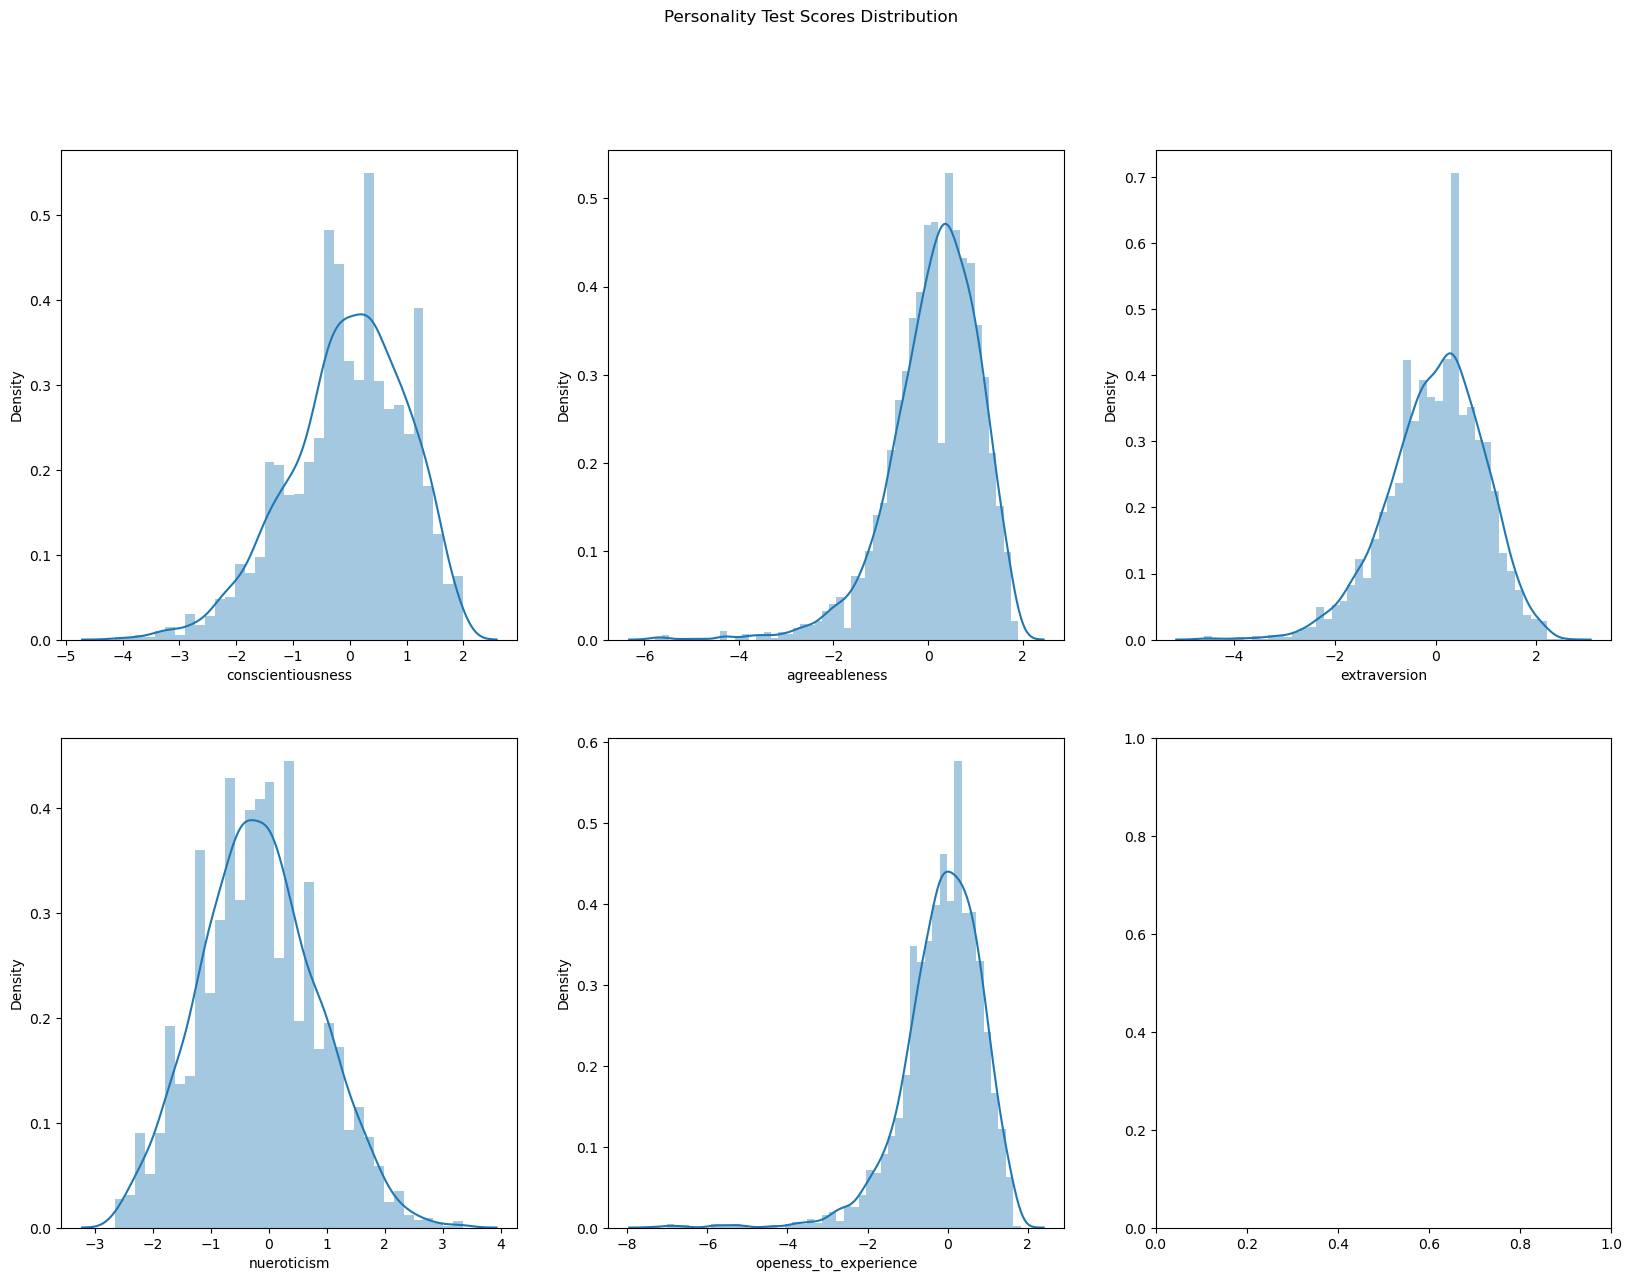

In [37]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
 
fig.suptitle('Personality Test Scores Distribution')

sns.distplot(ax=axes[0, 0],a=data['conscientiousness'])
sns.distplot(ax=axes[0, 1],a=data['agreeableness'])
sns.distplot(ax=axes[0, 2],a=data['extraversion'])
sns.distplot(ax=axes[1, 0],a=data['nueroticism'])
sns.distplot(ax=axes[1, 1],a=data['openess_to_experience'])
plt.show()



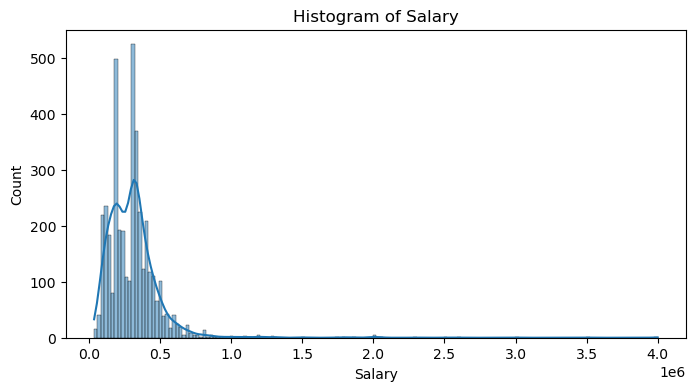

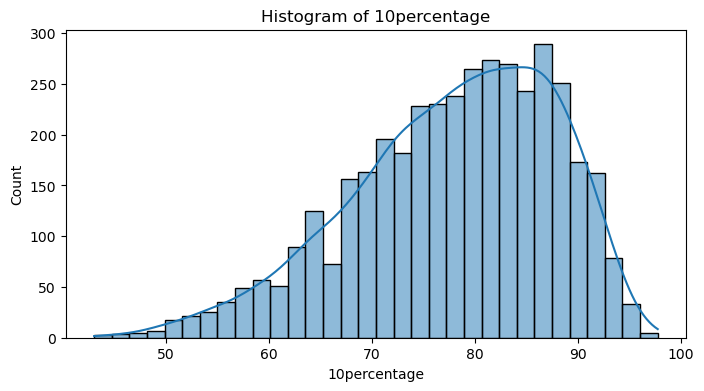

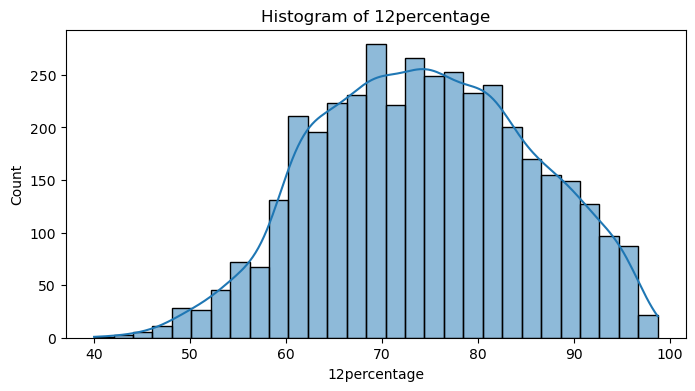

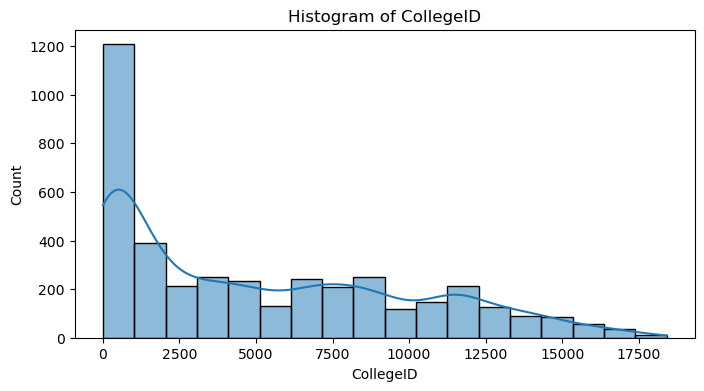

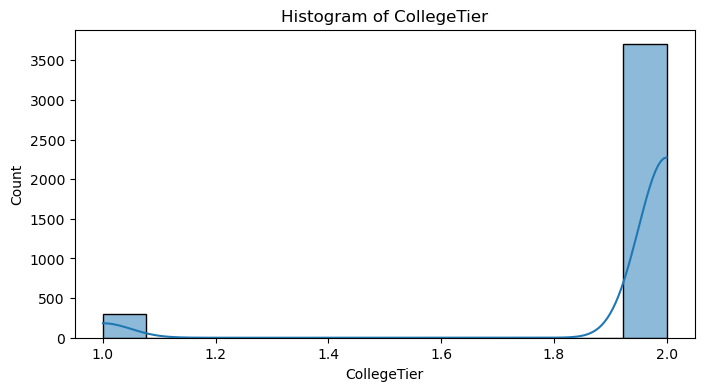

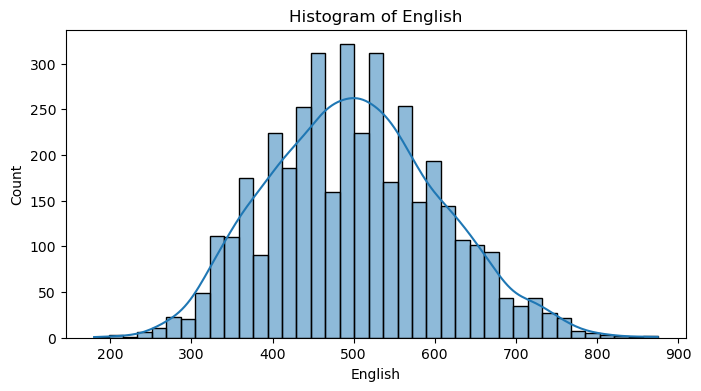

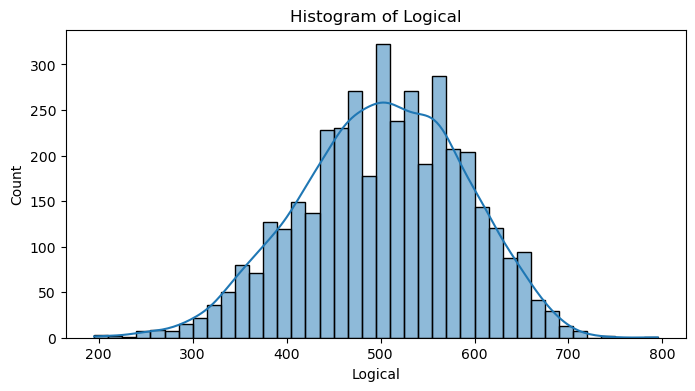

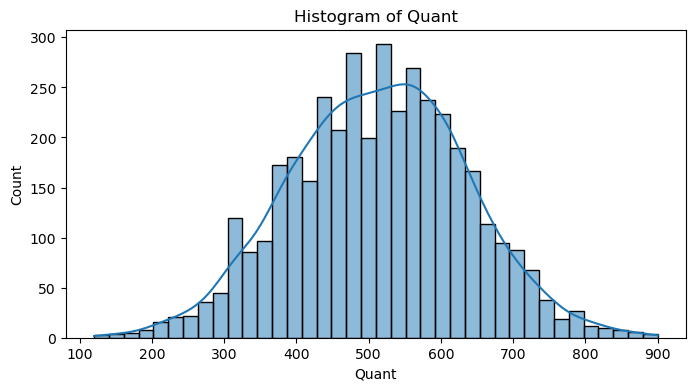

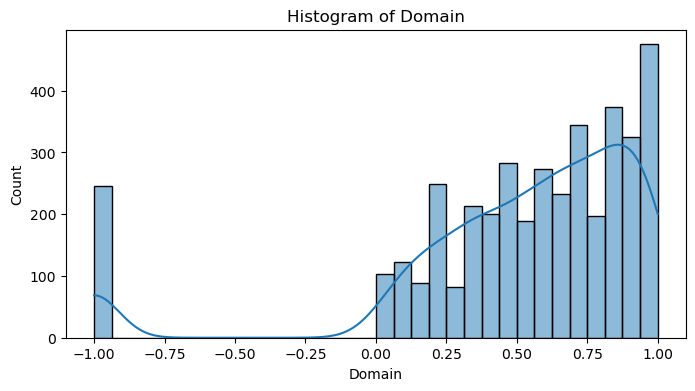

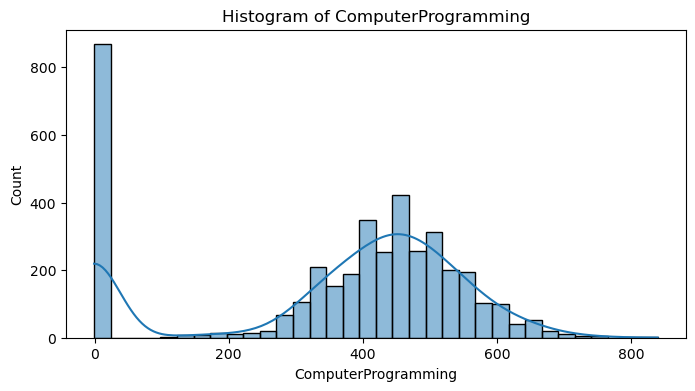

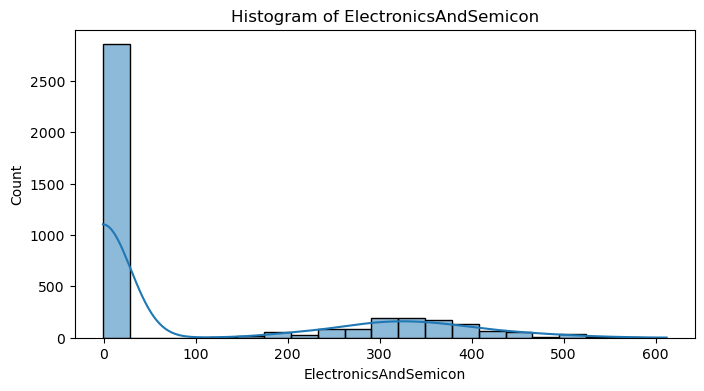

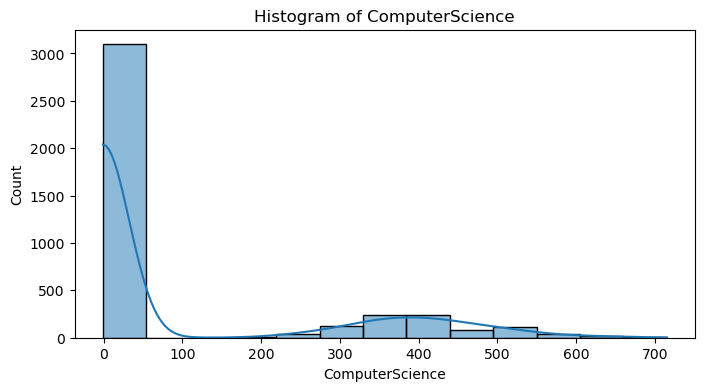

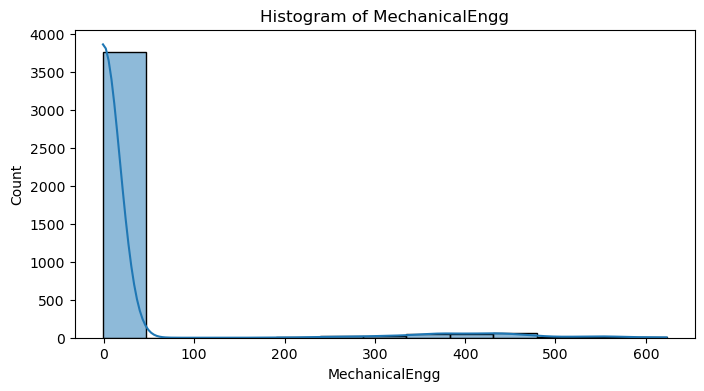

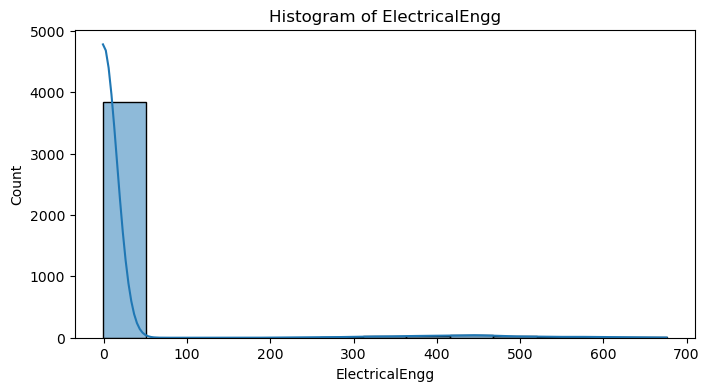

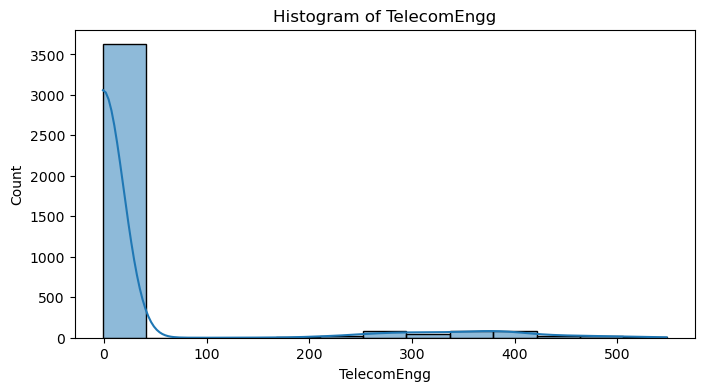

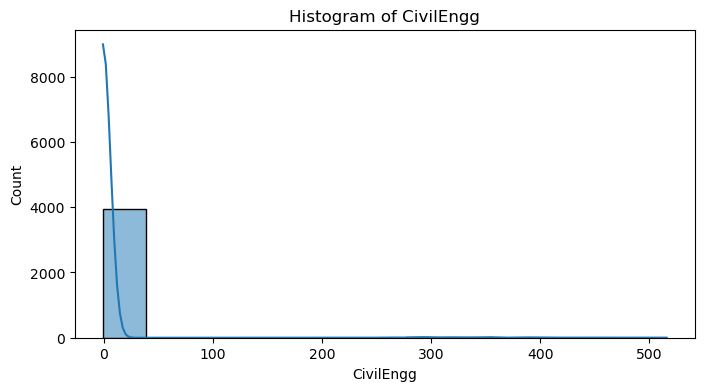

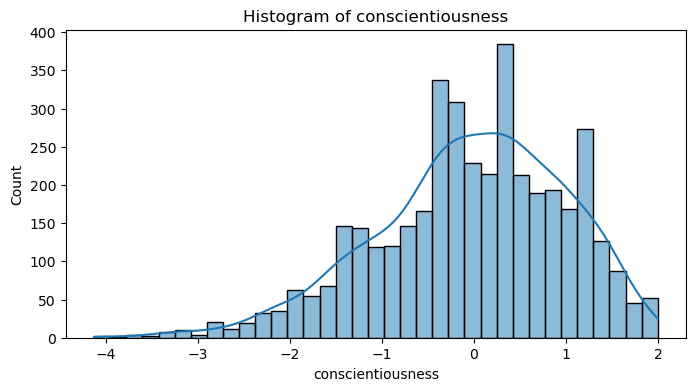

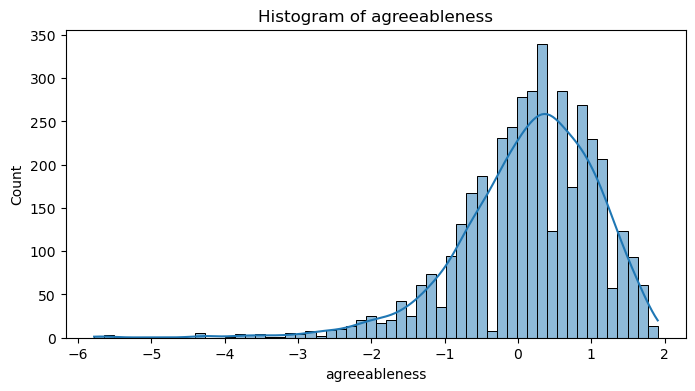

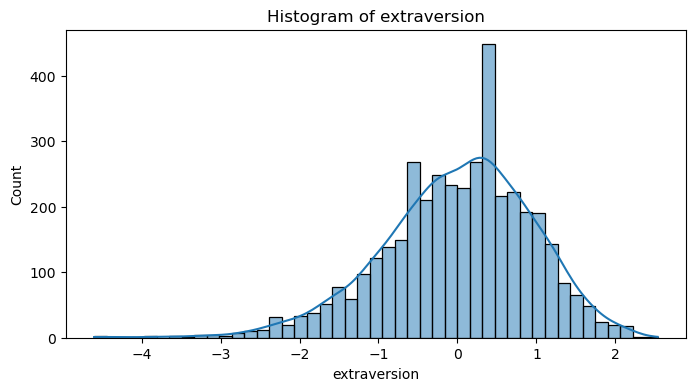

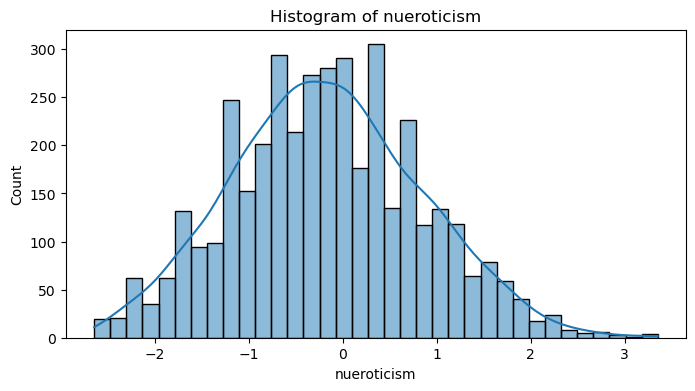

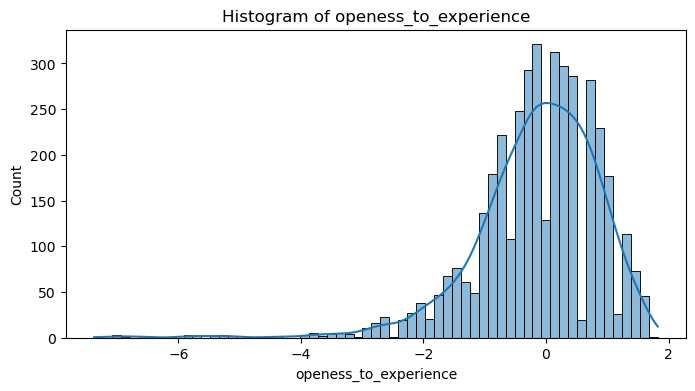

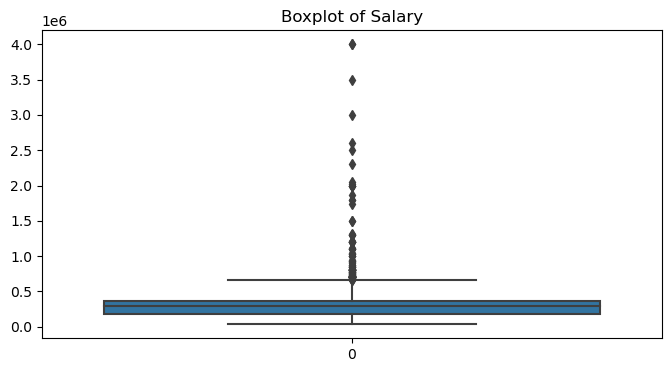

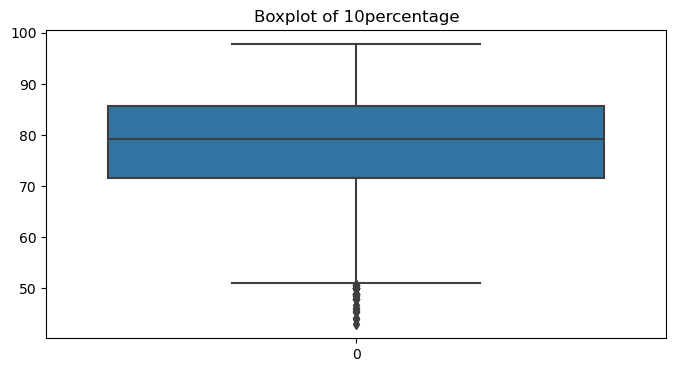

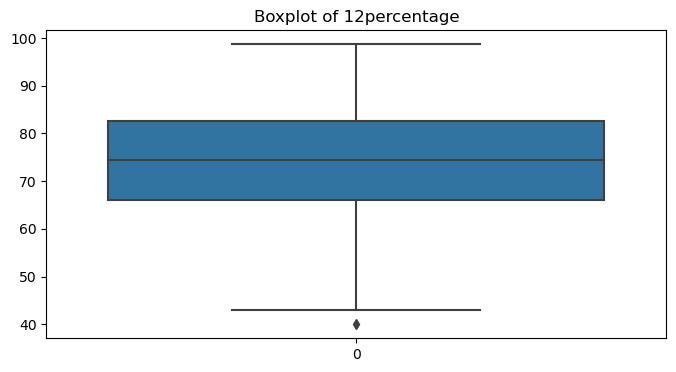

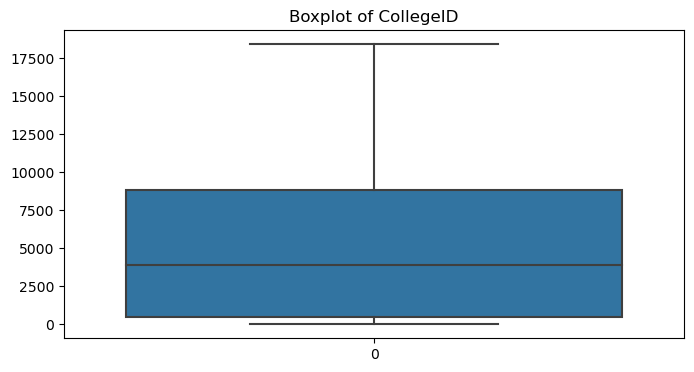

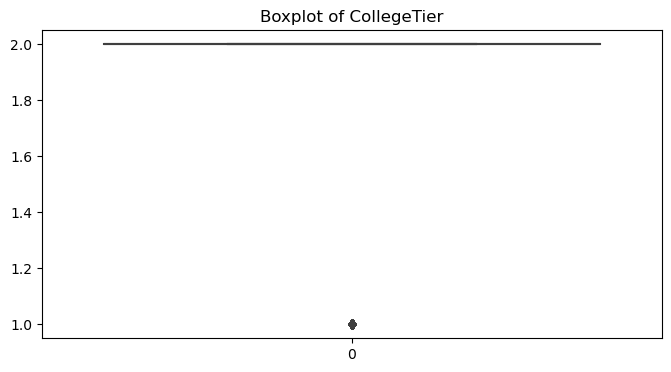

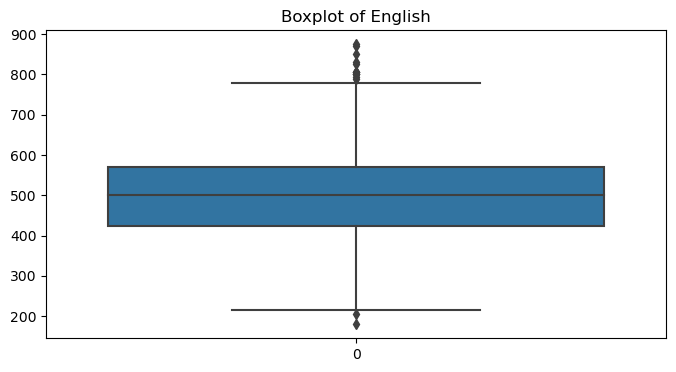

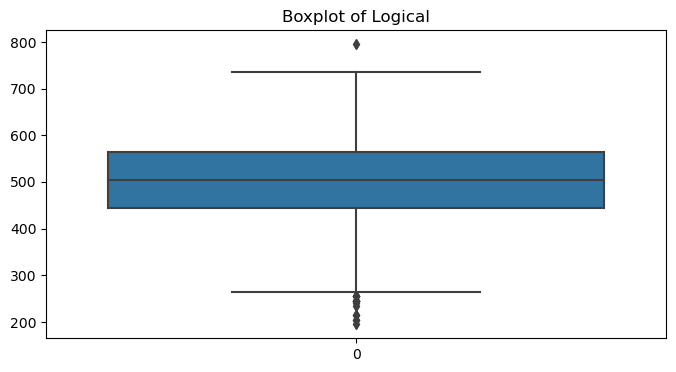

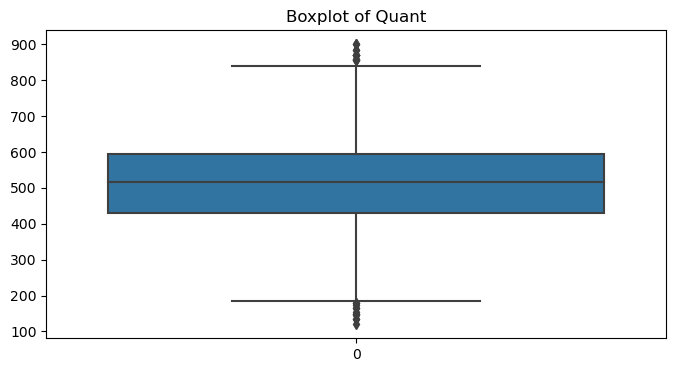

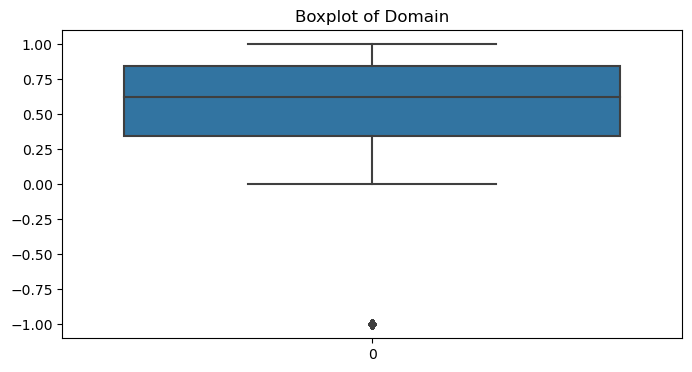

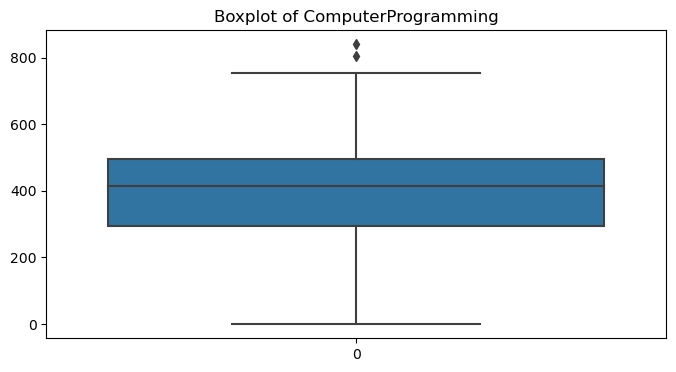

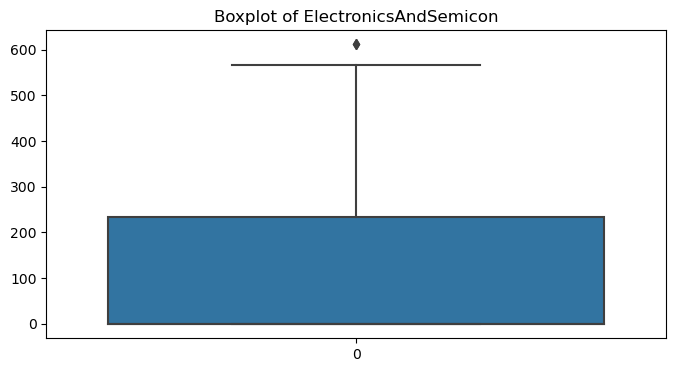

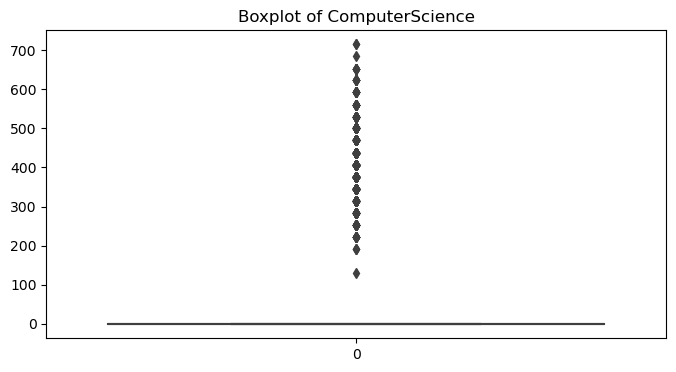

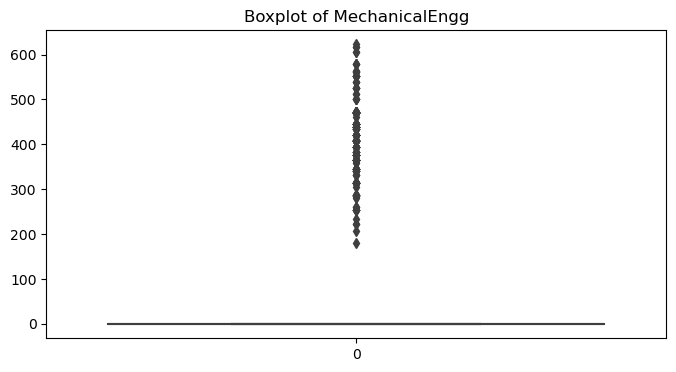

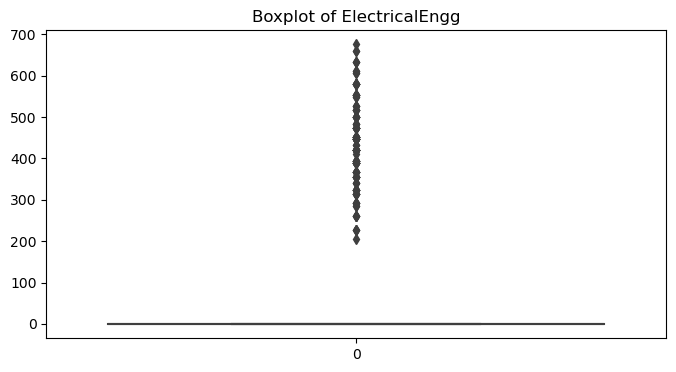

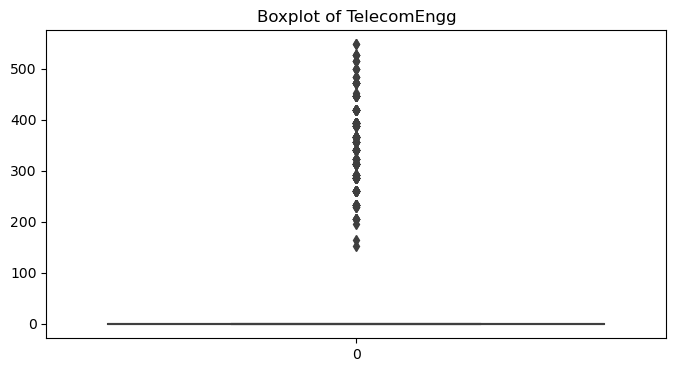

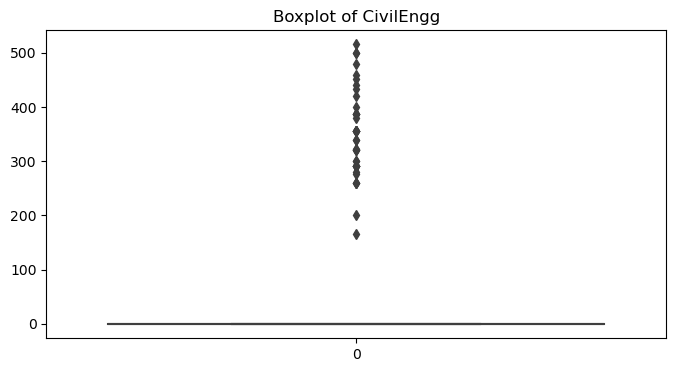

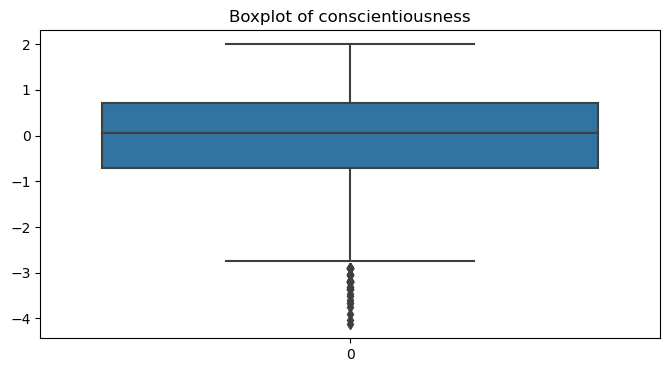

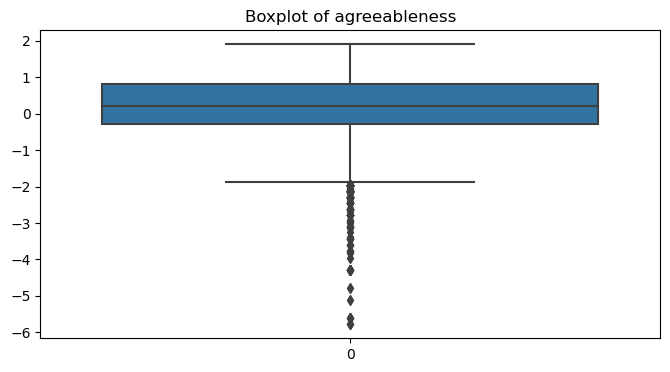

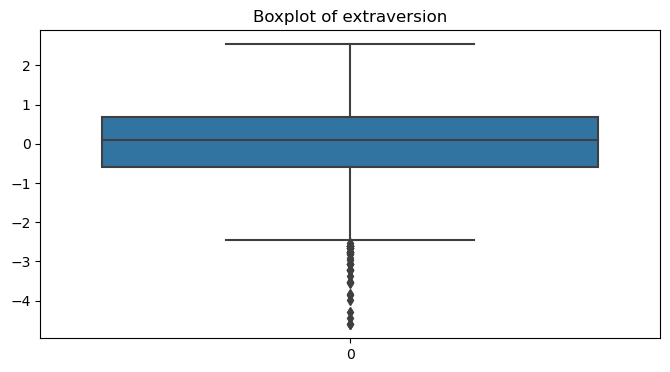

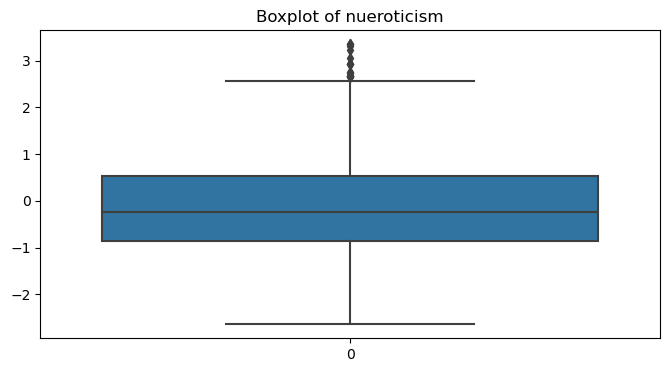

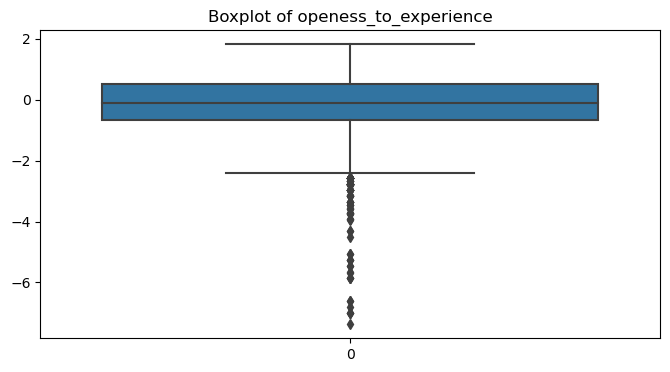

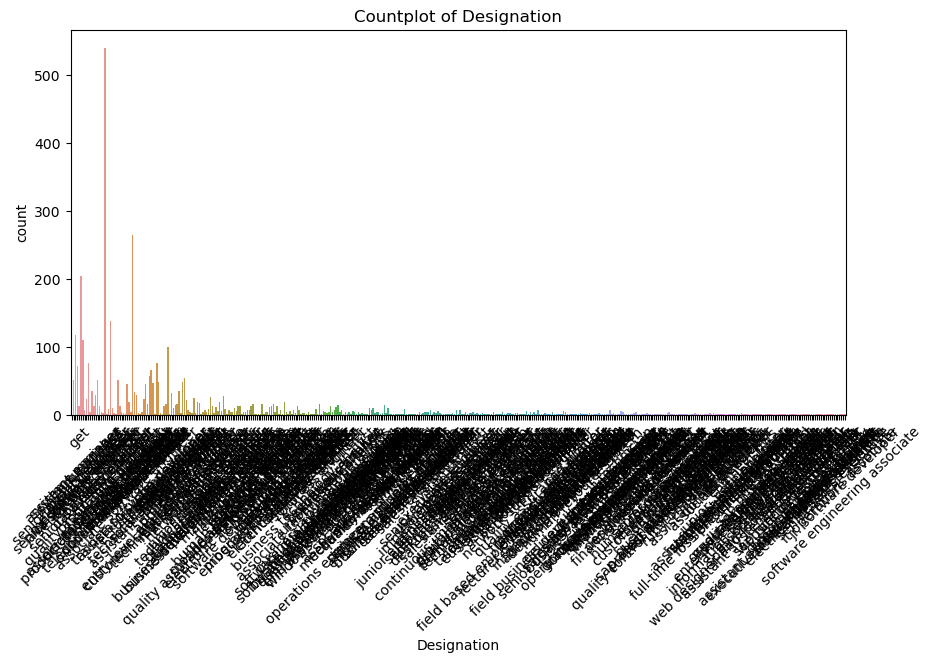

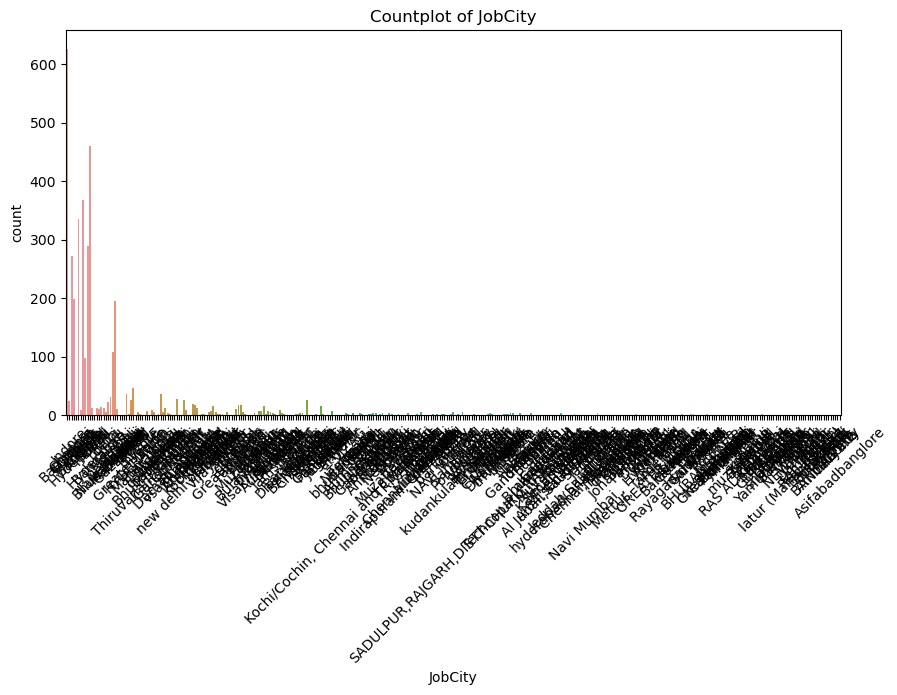

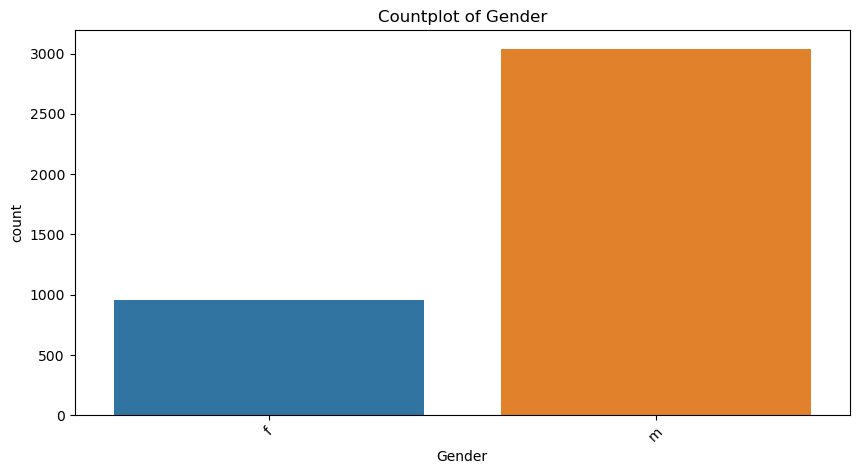

In [38]:
# Numerical columns
numerical_columns = ['Salary', '10percentage', '12percentage', 'CollegeID', 'CollegeTier', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# boxplots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

#  countplots for categorical columns
categorical_columns = ['Designation', 'JobCity', 'Gender']
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column,data=data)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\Afrin\AppData\Local\Temp\ipykernel_21772\1000869599.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0],a=tenth)
C:\Users\Afrin\AppData\Local\Temp\ipykernel_21772\1000869599.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1],a=twelve)
C:\Users\Afrin\AppData\Local

<Axes: xlabel='collegeGPA', ylabel='Density'>

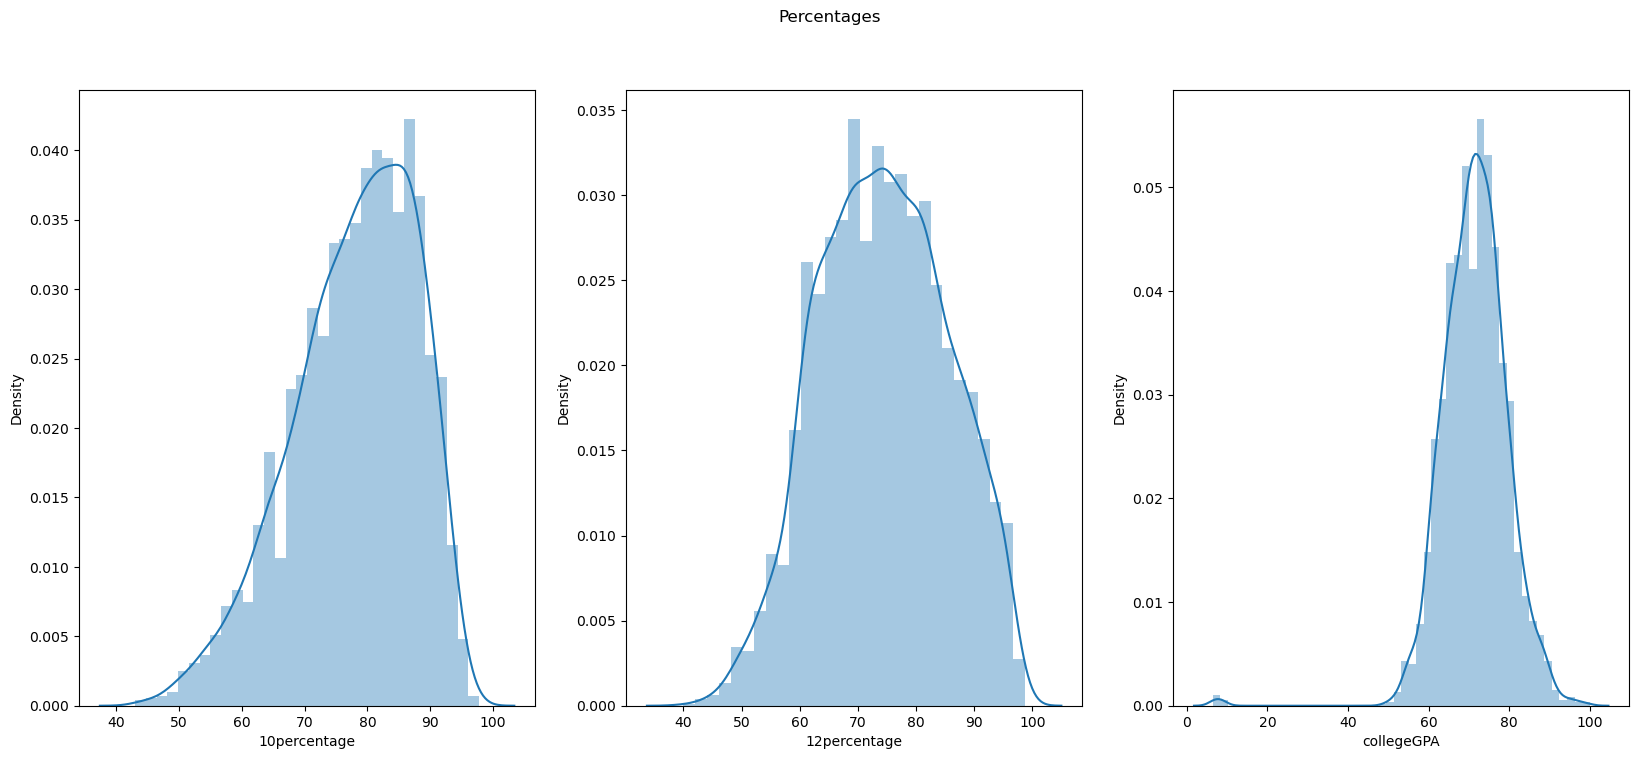

In [39]:
tenth = data['10percentage']
twelve = data['12percentage']
clg_gpa = data['collegeGPA']

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
 
fig.suptitle('Percentages')

sns.distplot(ax=axes[0],a=tenth)
sns.distplot(ax=axes[1],a=twelve)
sns.distplot(ax=axes[2],a=clg_gpa)

In [40]:
popular_role = list(pd.DataFrame(df['Designation'].value_counts()).head(15).index)

In [42]:
popular_role

temp = data[data['Designation'].isin(popular_role)]
temp

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194
5,train,1027655,300000.0,6/1/14 0:00,present,system engineer,Hyderabad,m,7/2/92 0:00,89.92,state board,2010,87.00,state board,5086,2,B.Tech/B.E.,electronics and communication engineering,76.32,5086,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608
6,train,947847,300000.0,8/1/14 0:00,5/1/15 0:00,java software engineer,Banglore,m,2/1/93 0:00,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,computer science & engineering,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,train,358393,430000.0,3/1/13 0:00,present,system engineer,Gurgaon,f,5/14/90 0:00,90.40,cbse,2007,87.00,cbse,167,2,B.Tech/B.E.,computer engineering,77.00,167,0,Haryana,2012,585,595,675,0.901490,545,-1,-1,-1,-1,-1,-1,0.2782,0.3448,0.0914,-1.1422,-0.6035
3986,train,51897,225000.0,1/1/10 0:00,10/1/10 0:00,software test engineer,Bangalore,f,2/28/86 0:00,84.93,maharashtra state board,2004,81.67,maharashtra state board,127,2,MCA,computer application,74.73,127,0,Maharashtra,2010,515,545,545,0.819417,505,-1,-1,-1,-1,-1,-1,-0.1082,1.1248,1.9782,-1.9354,-1.0774
3989,train,1204604,300000.0,9/1/14 0:00,present,software engineer,Bangalore,m,11/23/91 0:00,74.88,state board,2010,82.55,state board,3572,2,B.Tech/B.E.,computer science & engineering,80.00,3572,0,Karnataka,2014,500,480,500,0.356536,465,-1,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.0333,0.6721
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.6498,-0.9194


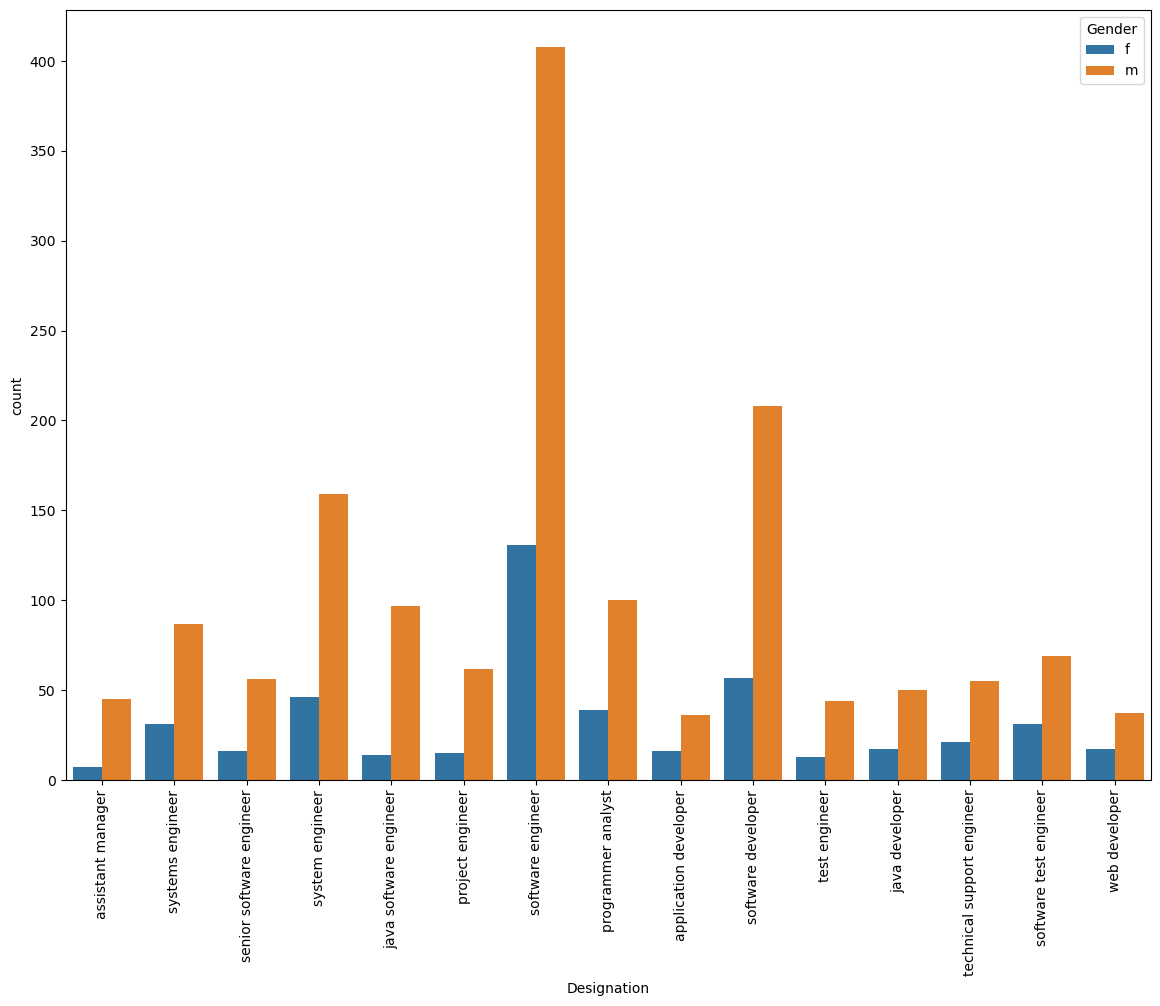

In [49]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'],hue=data['Gender'])
plt.xticks(rotation=90)
plt.show()

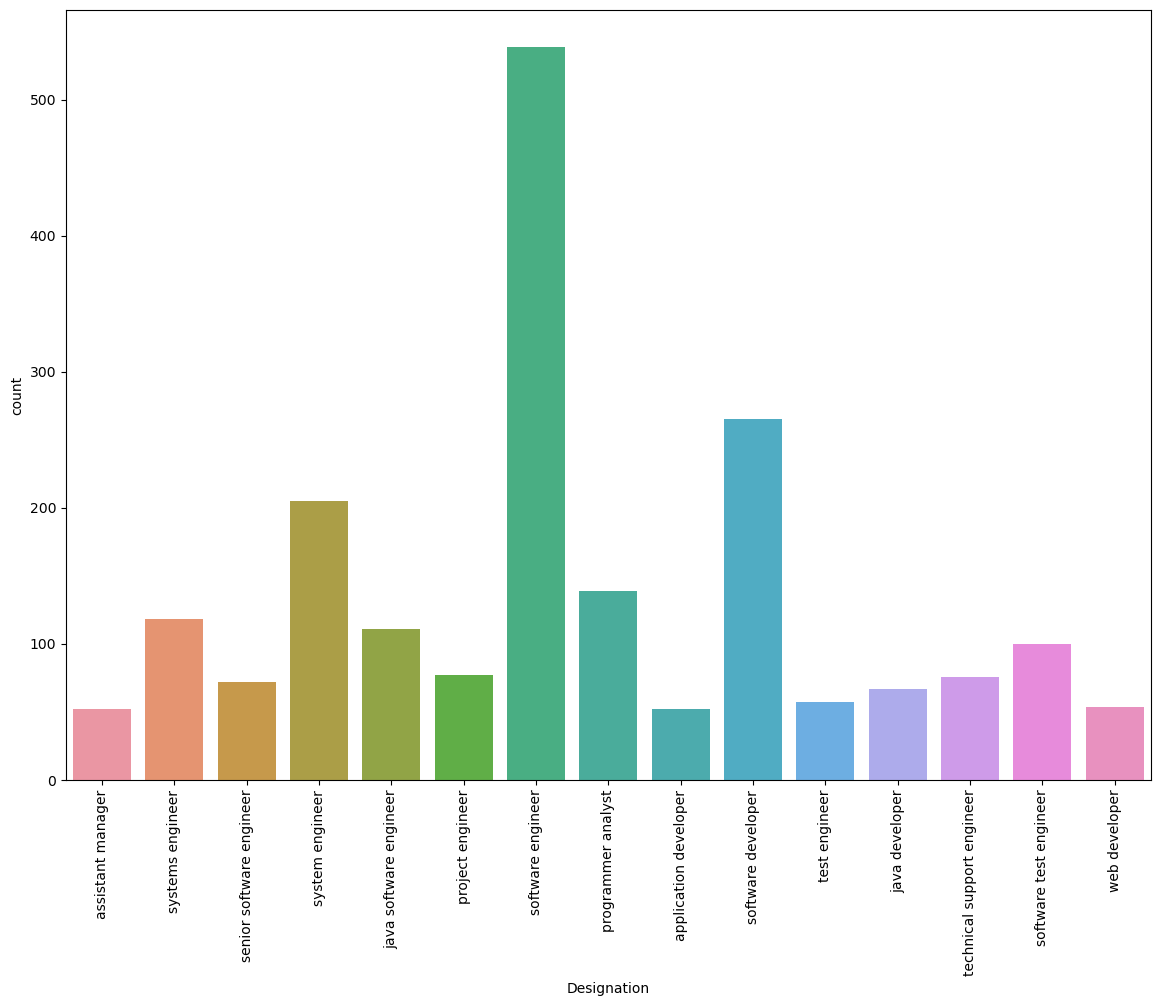

In [50]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'])
plt.xticks(rotation=90)
plt.show()

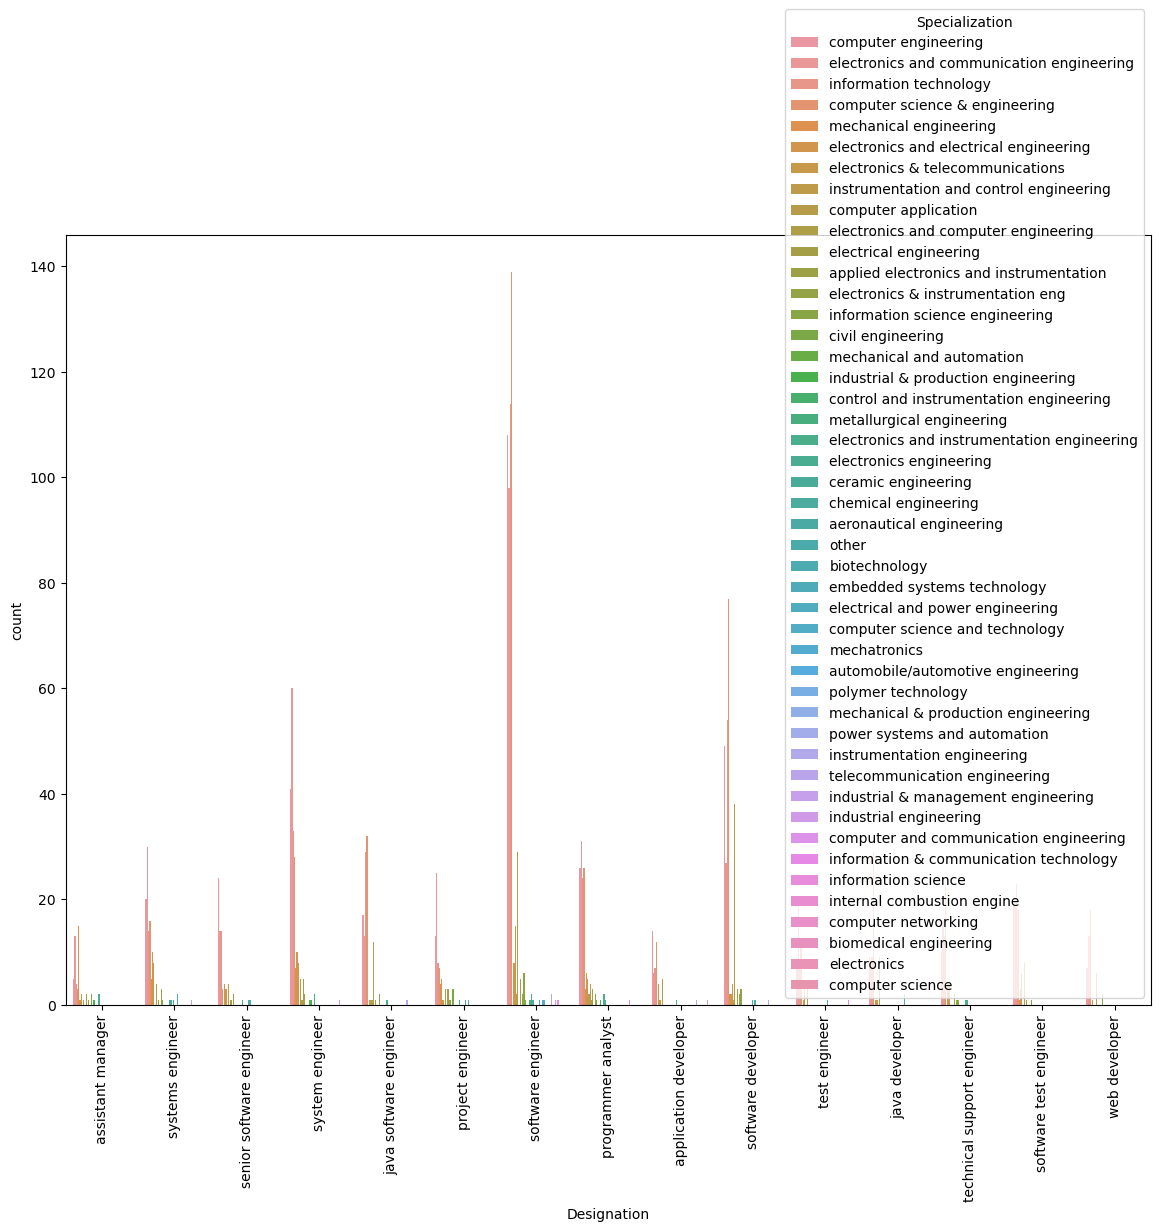

In [71]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_role),'Designation'],hue=data['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [47]:
popular_city = list(pd.DataFrame(df['JobCities'].value_counts()).head(15).index)

In [52]:
popular_city

temp_1 = df[df['JobCities'].isin(popular_city)]
temp_1

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
0,203097,420000.0,2012-06-01,2024-02-23 13:01:21.349094,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,CS,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,138,34,STATE,Bangalore
2,810601,325000.0,2014-06-01,2024-02-23 13:01:21.349094,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,IT,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,114,32,CBSE,Chennai
3,267447,1100000.0,2011-07-01,2024-02-23 13:01:21.349094,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,CS,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,149,35,CBSE,Gurgaon
5,1027655,300000.0,2014-06-01,2024-02-23 13:01:21.349094,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.00,state board,5086,2,B.Tech/B.E.,ECE,76.32,5086,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,114,32,STATE,Hyderabad
6,947847,300000.0,2014-08-01,2015-05-01 00:00:00.000000,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,CSE,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,8,31,STATE,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,2011-10-01,2012-10-01 00:00:00.000000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,IT,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,11,37,CBSE,Delhi
3994,752781,100000.0,2013-07-01,2013-07-01 00:00:00.000000,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,ECE,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0,32,STATE,Hyderabad
3995,355888,320000.0,2013-07-01,2024-02-23 13:01:21.349094,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,CS,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,125,33,STATE,Bangalore
3996,947111,200000.0,2014-07-01,2015-01-01 00:00:00.000000,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,CSE,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,5,32,STATE,Bangalore


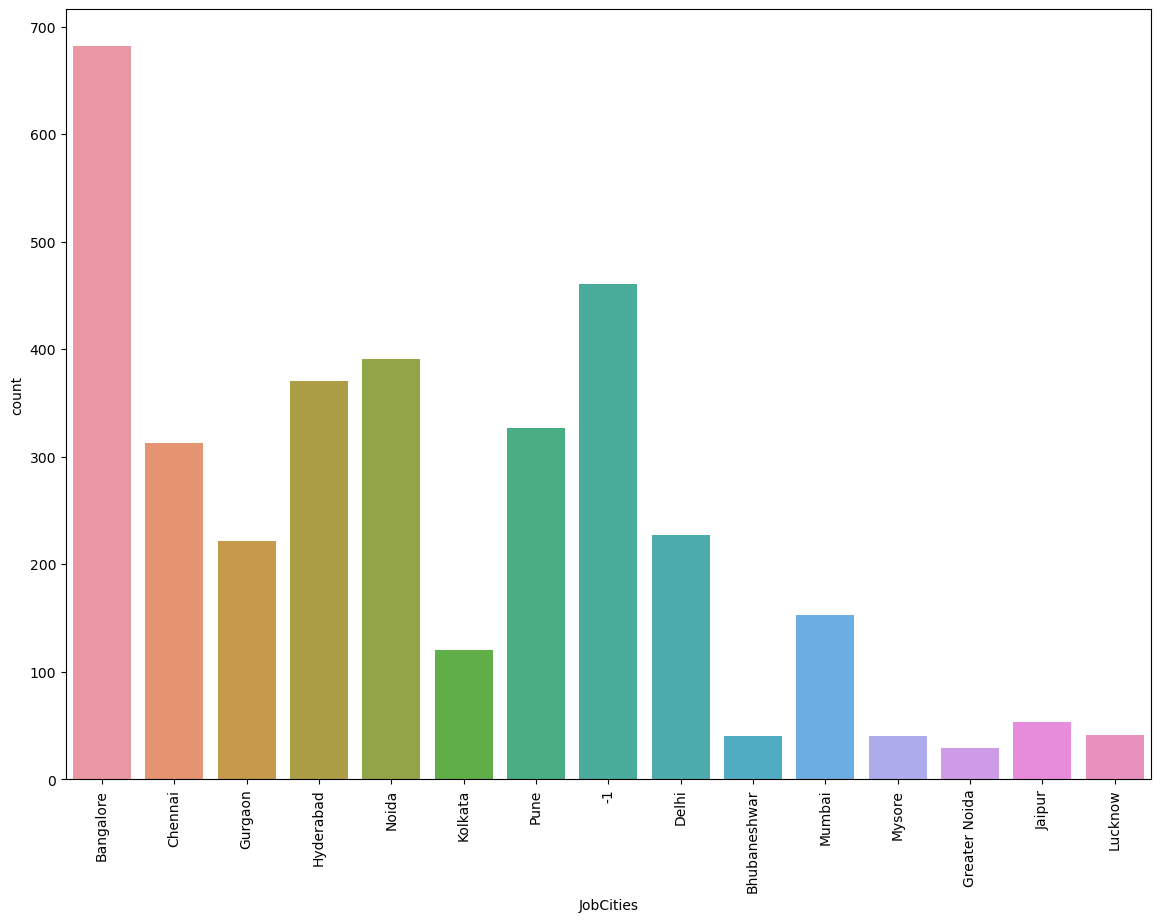

In [56]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'])
plt.xticks(rotation=90)
plt.show()

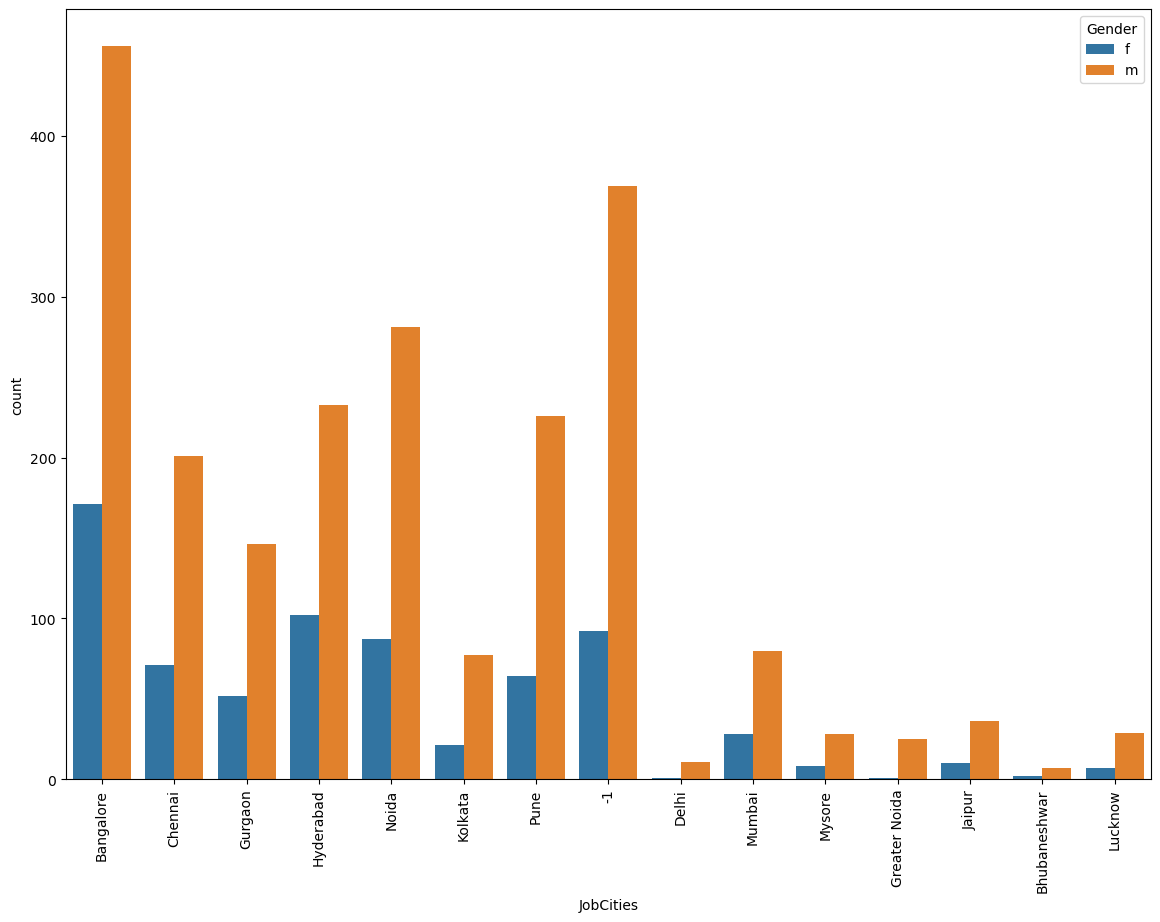

In [57]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['JobCity'].isin(popular_city),'JobCities'],hue=data['Gender'])
plt.xticks(rotation=90)
plt.show()

### Bi-Variate Analysis

<Axes: xlabel='Salary', ylabel='Gender'>

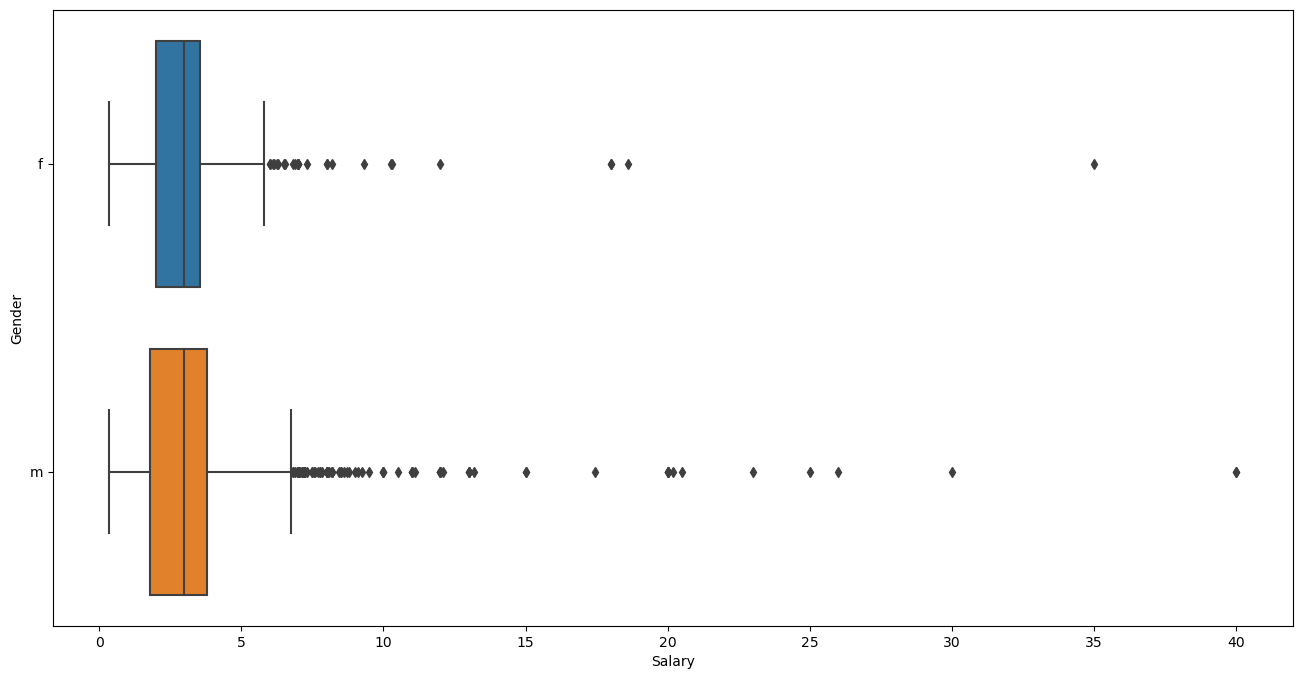

In [59]:
plt.figure(figsize=(16,8))
sns.boxplot(x=data['Salary']/100000,y=data['Gender'])

In [61]:
temp_data = pd.DataFrame(df[df['Tenure']>=0])
temp_data.shape

(3959, 42)

In [62]:
temp_data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
0,203097,420000.0,2012-06-01,2024-02-23 13:01:21.349094,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,CS,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,138,34,STATE,Bangalore
1,579905,500000.0,2013-09-01,2024-02-23 13:01:21.349094,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,ECE,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,123,35,CBSE,Indore
2,810601,325000.0,2014-06-01,2024-02-23 13:01:21.349094,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,IT,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,114,32,CBSE,Chennai
3,267447,1100000.0,2011-07-01,2024-02-23 13:01:21.349094,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,CS,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,149,35,CBSE,Gurgaon
4,343523,200000.0,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,ECE,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,11,33,CBSE,Manesar


<Axes: xlabel='Tenure', ylabel='Salary'>

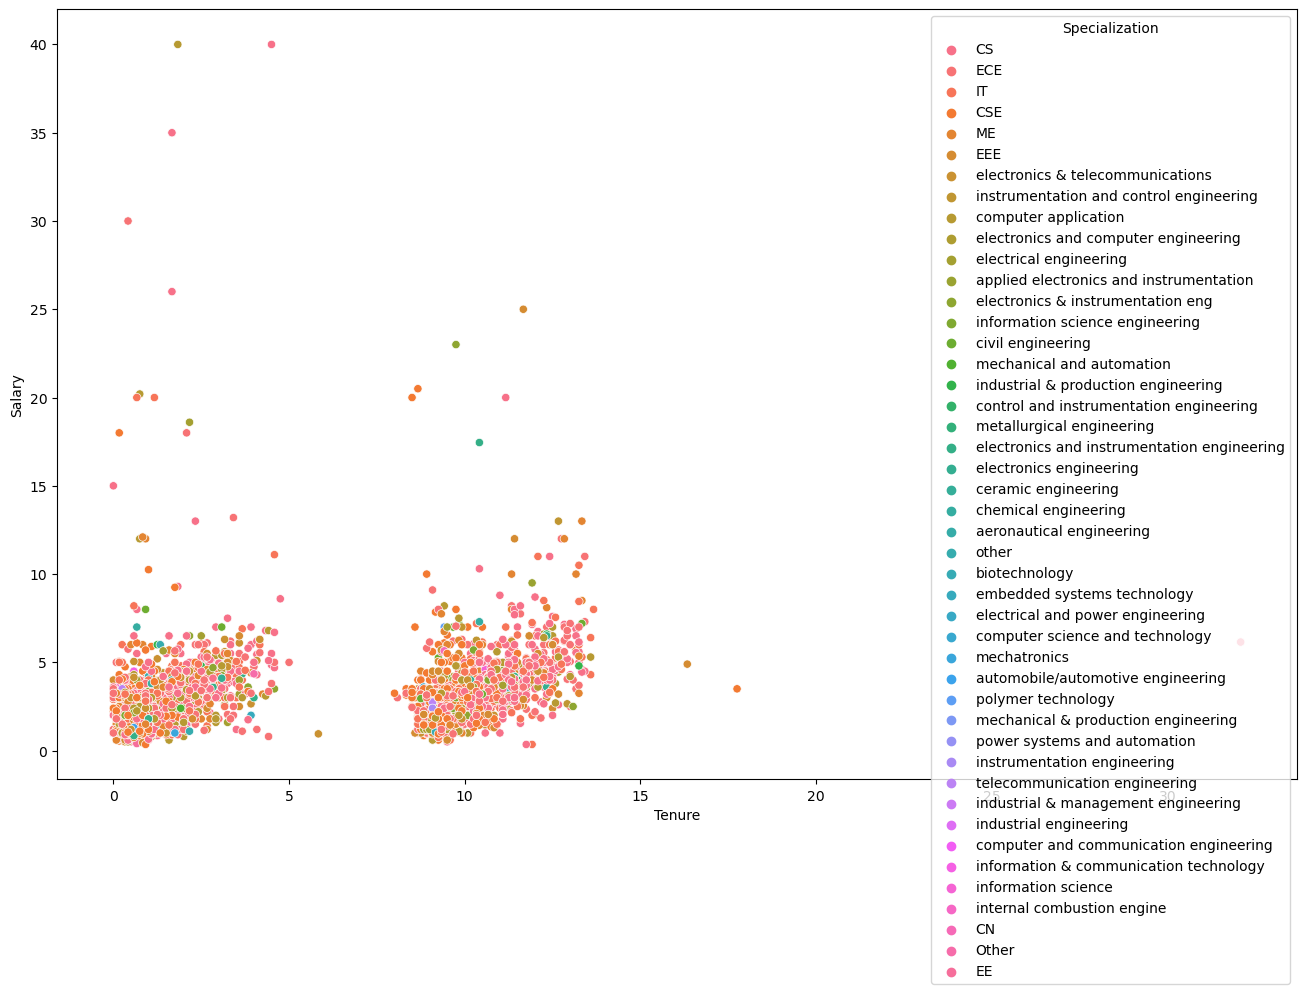

In [63]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=temp_data['Tenure']/12,y=temp_data['Salary']/100000,hue=temp_data['Specialization'])

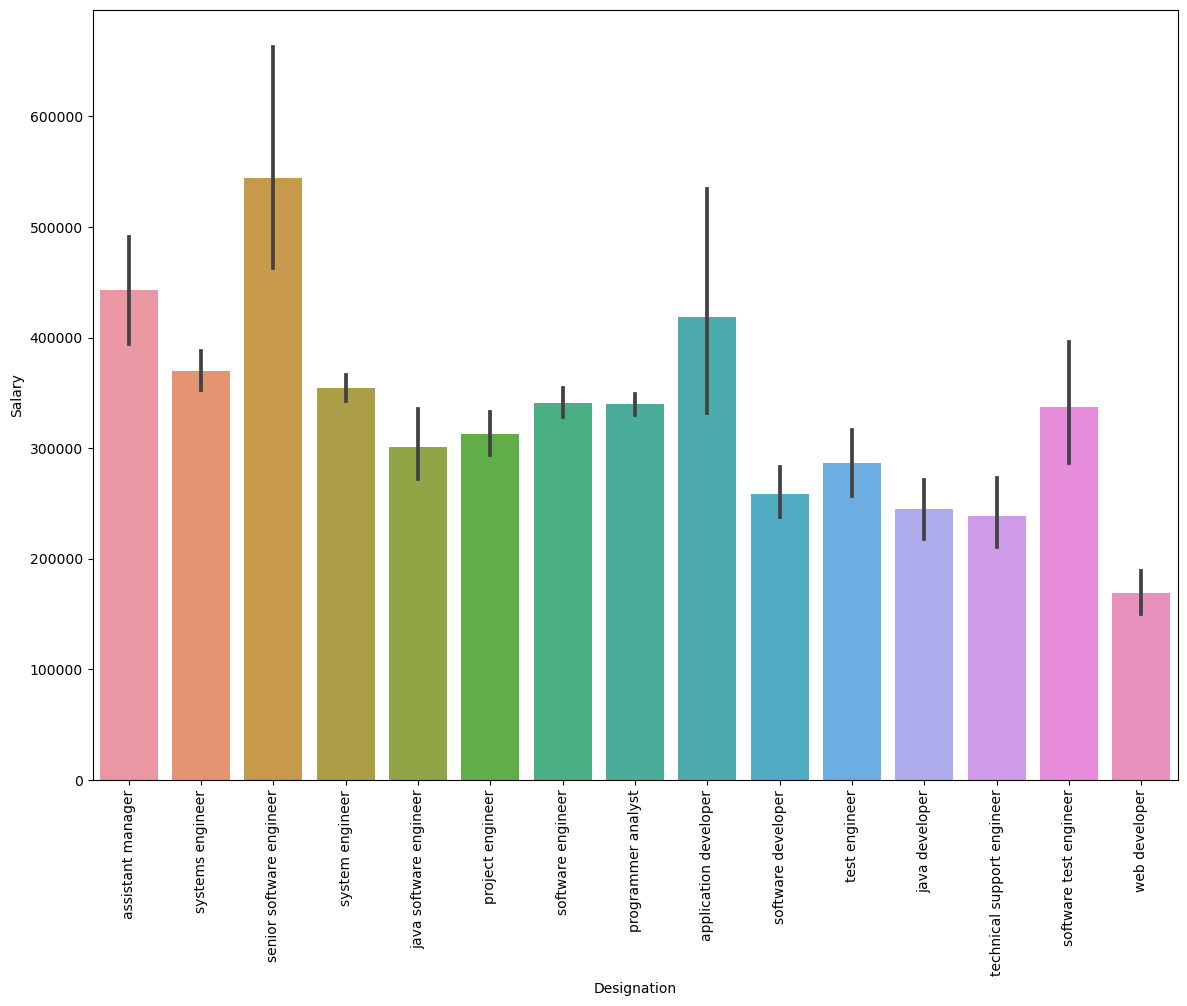

In [64]:
plt.figure(figsize=(14,10))
sns.barplot(x=data.loc[df['Designation'].isin(popular_role),'Designation'],y=data['Salary'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Specialization', ylabel='Salary'>

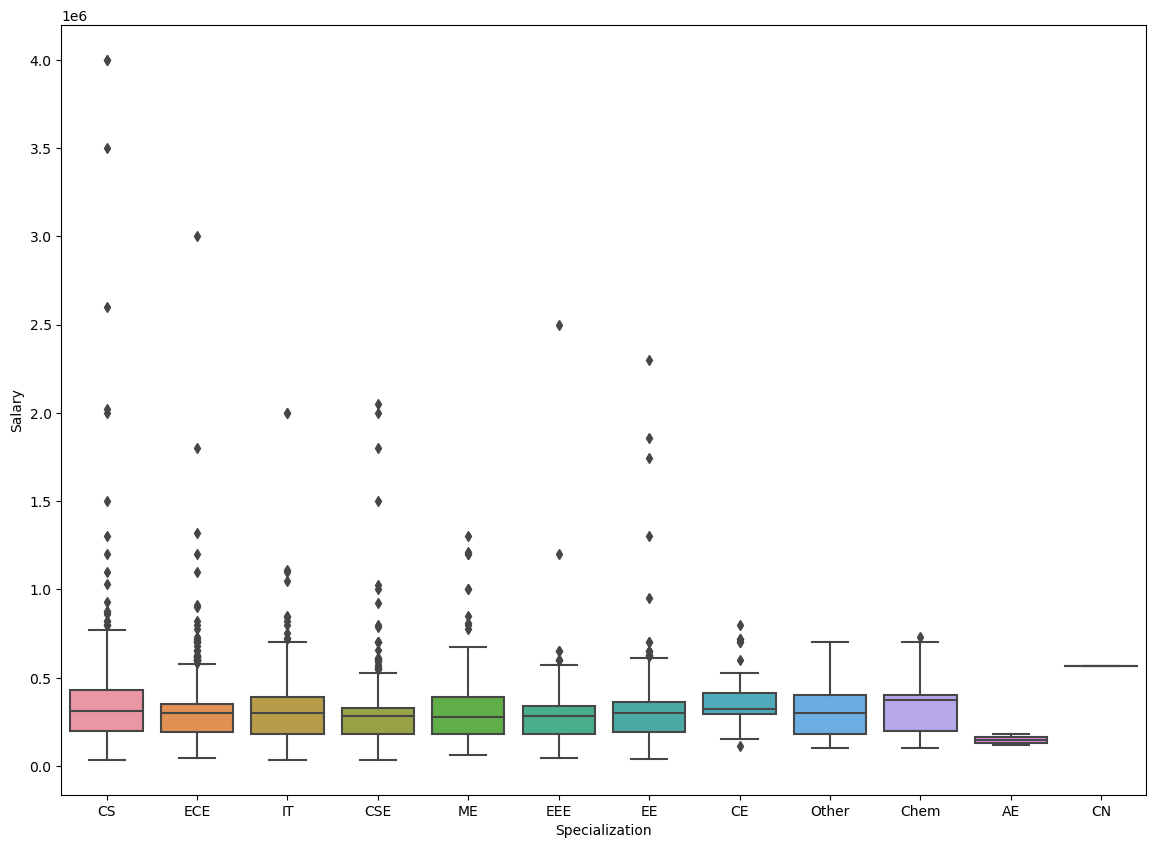

In [72]:
plt.figure(figsize=(14,10))
sns.boxplot(x=df['Specialization'],y=df['Salary'])

<Axes: xlabel='Specialization', ylabel='count'>

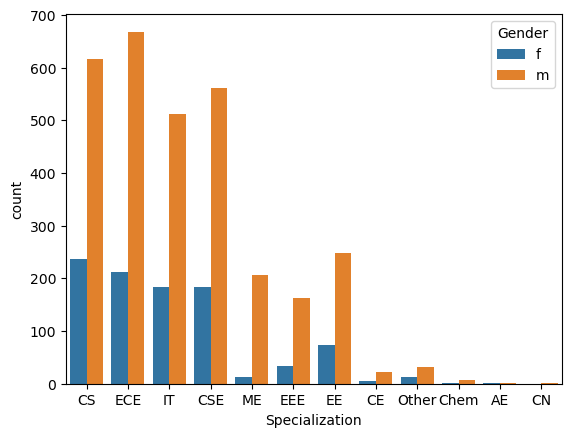

In [73]:
sns.countplot(x=df['Specialization'],hue=data['Gender'])

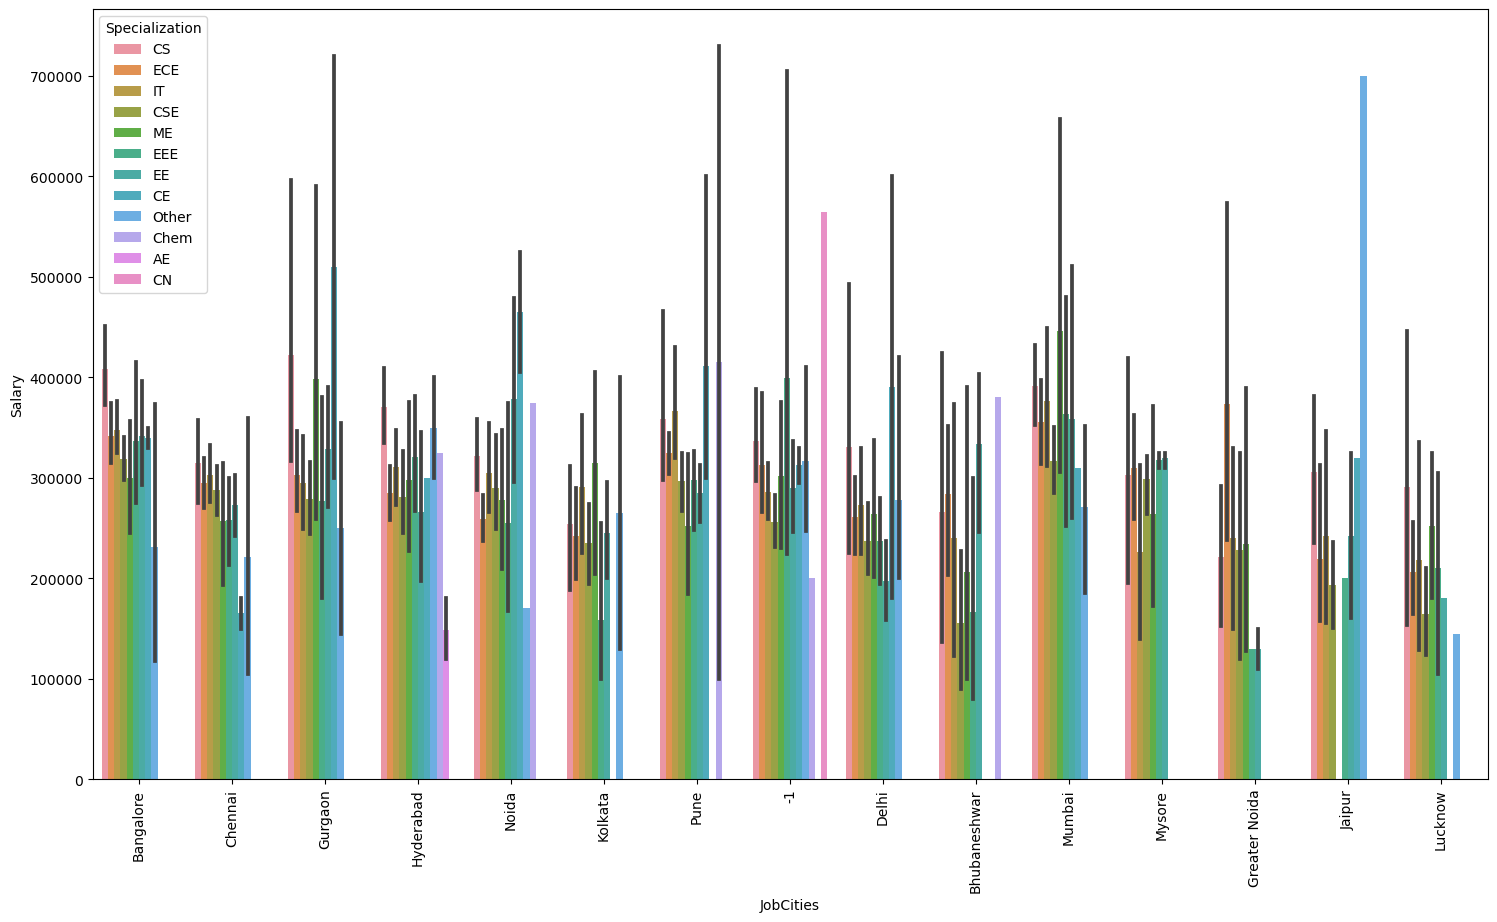

In [78]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=data['Salary'],hue=df['Specialization'])
plt.xticks(rotation=90)
plt.show()

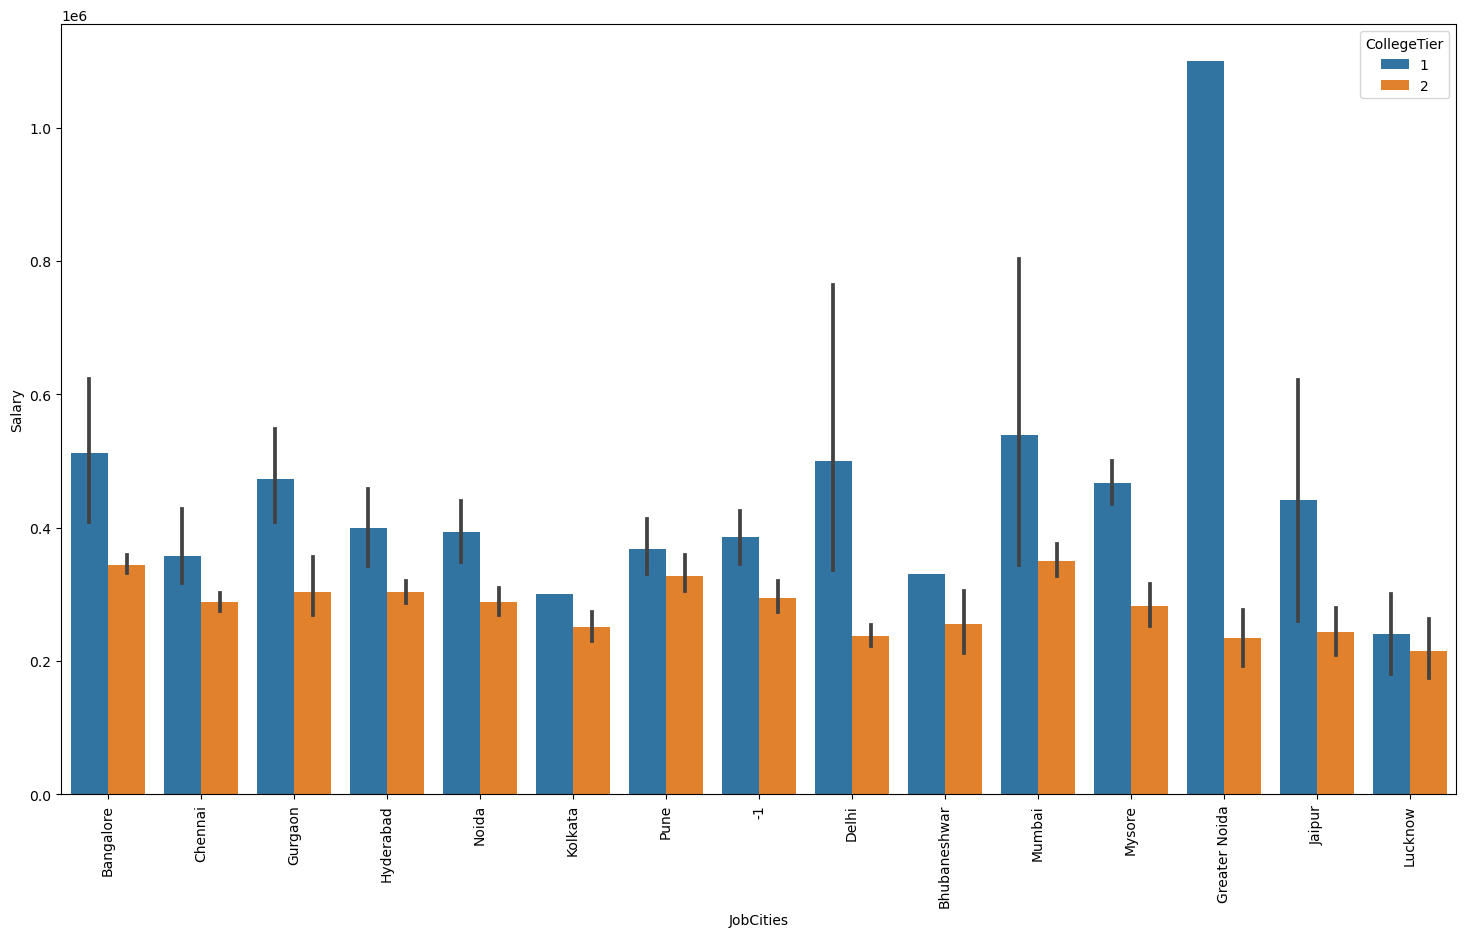

In [80]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=data['Salary'],hue=df['CollegeTier'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Gender', ylabel='Salary'>

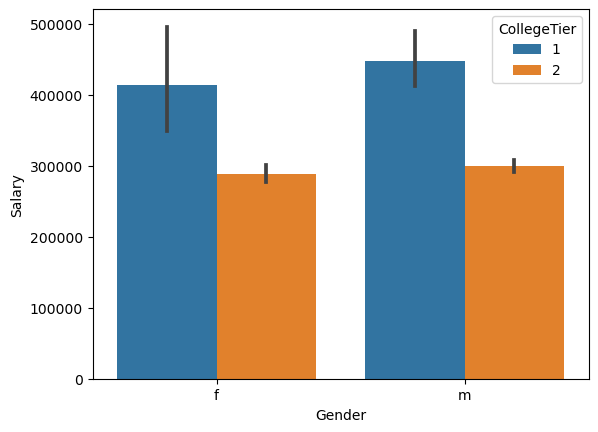

In [81]:
sns.barplot(x=df['Gender'],y=df['Salary'],hue=df['CollegeTier'])

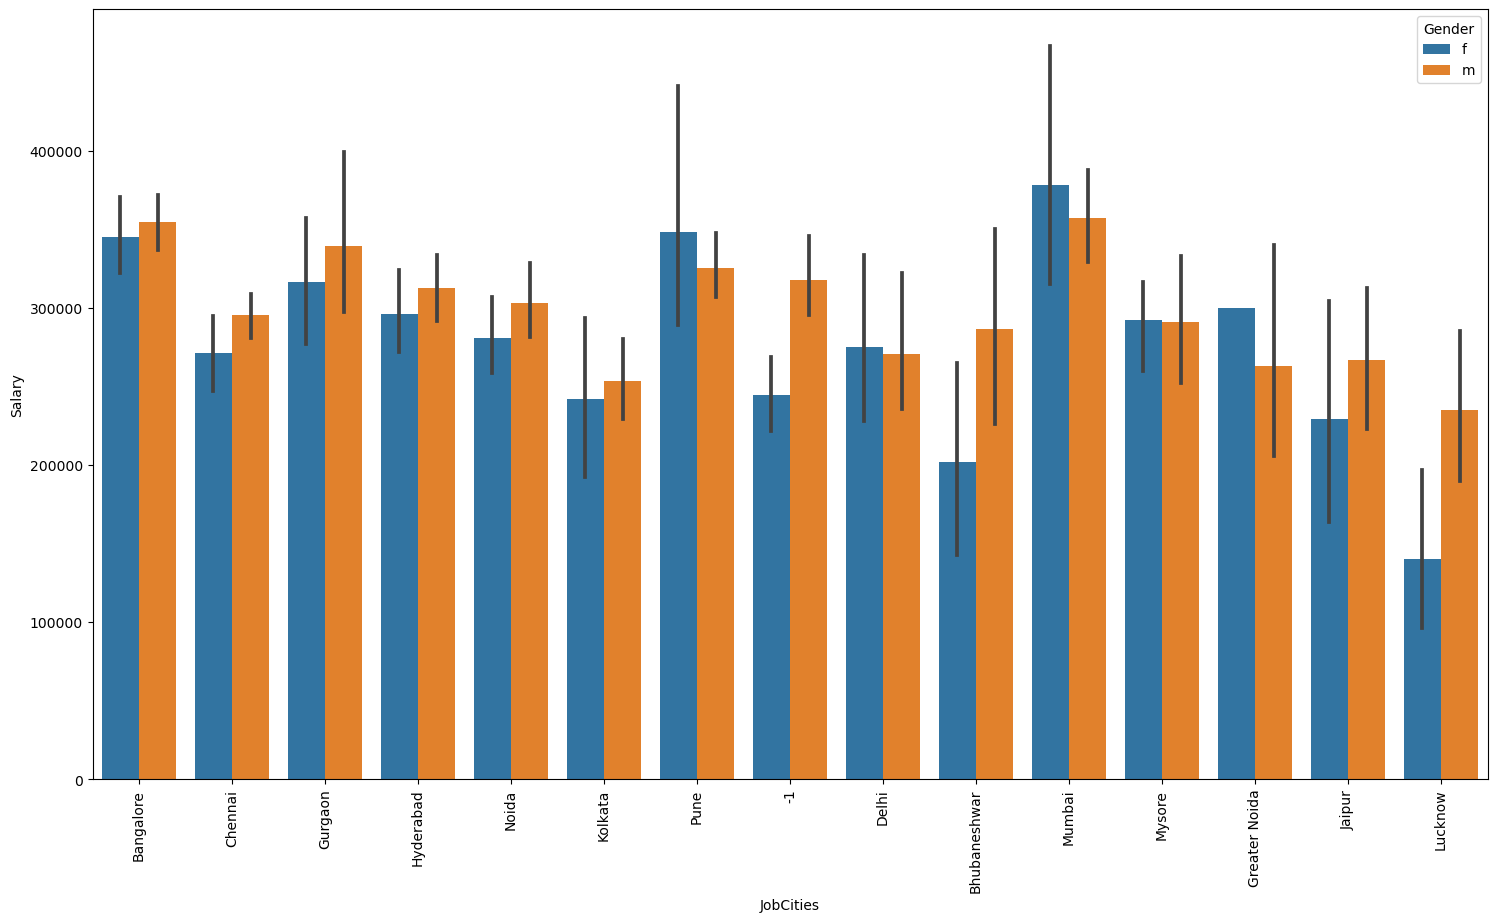

In [82]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=df['Salary'],hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()


### Research Questions

#### Claim-1 : Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”

In [84]:
claim_1_data = df[(df['Designation'].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df['Tenure']//12==0)]

claim_1_data

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
24,963123,335000.0,2014-06-01,2015-06-01,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,2010,90.00,state board,9173,2,B.Tech/B.E.,CSE,76.00,9173,1,Telangana,2014,625,555,630,0.356536,475,-1,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692,11,31,STATE,Hyderabad
31,1094324,340000.0,2014-08-01,2015-04-01,software engineer,Bangalore,m,1992-10-23,77.20,state board,2010,86.10,state board,7282,2,B.Tech/B.E.,CSE,71.00,7282,0,Tamil Nadu,2014,560,485,450,0.622643,485,-1,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.5021,0.2889,7,32,STATE,Bangalore
125,796063,300000.0,2014-11-01,2015-03-01,programmer analyst,Kolkata,m,1992-03-19,90.00,cbse,2009,86.40,cbse,222,2,B.Tech/B.E.,EE,65.70,222,0,Jharkhand,2014,605,325,515,0.837621,334,-1,-1,-1,500,-1,-1,0.1282,-0.2871,1.3933,0.6530,-0.6692,3,32,CBSE,Kolkata
168,827550,375000.0,2014-07-01,2015-04-01,software engineer,Noida,m,1993-03-28,85.80,cbse,2010,78.40,cbse,47,1,B.Tech/B.E.,CSE,77.56,47,1,Delhi,2014,530,595,340,0.842248,485,-1,469,-1,-1,-1,-1,1.2772,1.2114,-2.1418,-1.7556,-0.6692,8,31,CBSE,Noida
209,602058,300000.0,2014-06-01,2015-04-01,associate engineer,Bangalore,f,1992-01-04,87.00,state board,2009,84.70,state board,12451,2,B.Tech/B.E.,IT,76.67,12451,1,Telangana,2013,360,435,295,0.190153,315,-1,-1,-1,-1,-1,-1,1.4208,0.8784,0.7785,-0.1076,0.8637,9,32,STATE,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3917,638674,105000.0,2014-10-01,2015-04-01,software engineer,Kochi/Cochin,f,1991-12-14,93.00,state board,2009,80.00,state board,6431,2,B.Tech/B.E.,CSE,72.78,6431,0,Kerala,2013,370,595,370,0.670743,455,-1,-1,-1,-1,-1,-1,-0.3027,0.5454,-0.6048,-1.6289,0.2889,5,33,STATE,Kochi
3925,797585,240000.0,2013-06-01,2014-02-01,software engineer,Bangalore,m,1989-11-14,65.00,state board,2007,50.00,state board,7000,2,MCA,CS,73.14,7000,1,Karnataka,2013,625,495,430,0.793581,495,-1,-1,-1,-1,-1,-1,-0.8772,-0.6201,-0.4511,0.6530,-0.4776,7,35,STATE,Bangalore
3978,1274658,320000.0,2013-08-01,2014-01-01,software engineer,Hyderabad,f,1991-04-24,89.70,icse,2009,86.70,icse,7685,2,B.Tech/B.E.,IT,80.00,7685,1,West Bengal,2013,720,675,570,-1.000000,-1,-1,-1,-1,-1,-1,-1,0.2718,1.2114,0.4711,-0.1076,0.8637,4,33,ICSE,Hyderabad
3979,212055,550000.0,2013-07-01,2014-04-01,software engineer,Bangalore,m,1989-07-22,69.16,up board,2006,65.66,up board,278,1,M.Tech./M.E.,CS,77.50,278,0,Uttar Pradesh,2013,395,435,645,0.990009,655,-1,-1,-1,-1,-1,-1,-0.5719,0.5008,-0.4891,0.4148,-1.2354,8,35,STATE,Bangalore


<Axes: xlabel='Designation', ylabel='Salary'>

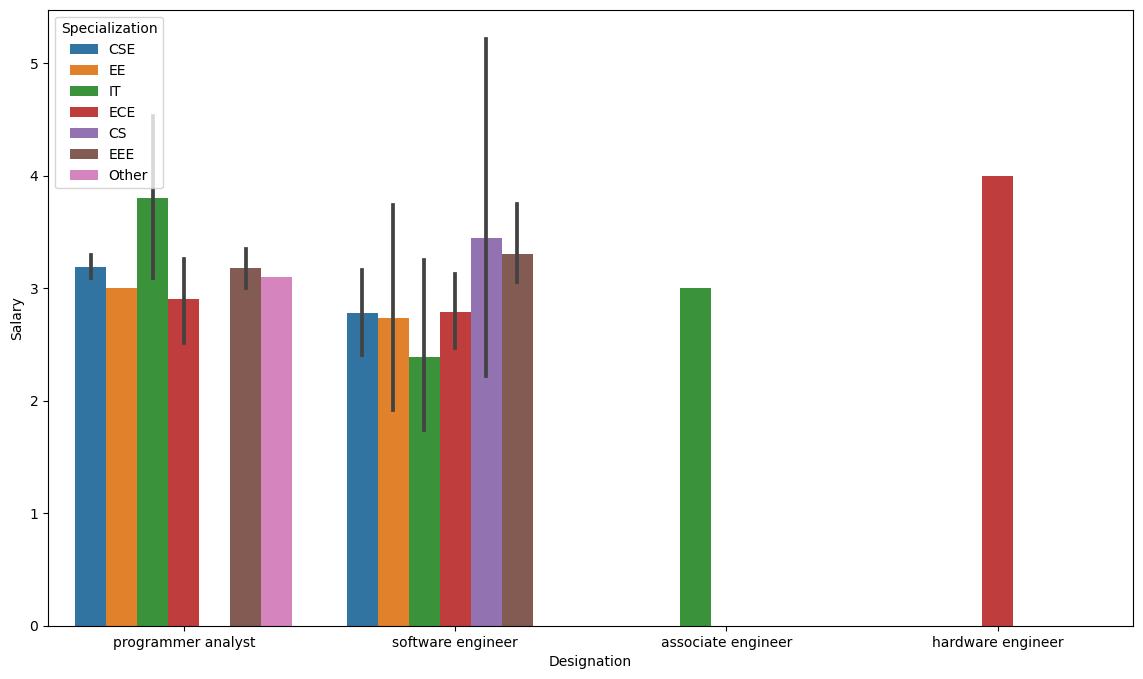

In [85]:
plt.figure(figsize=(14,8))
sns.barplot(x=claim_1_data['Designation'],y=claim_1_data['Salary']/100000,hue=claim_1_data['Specialization'])

#### Claim-2:Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

<Axes: xlabel='Specialization', ylabel='count'>

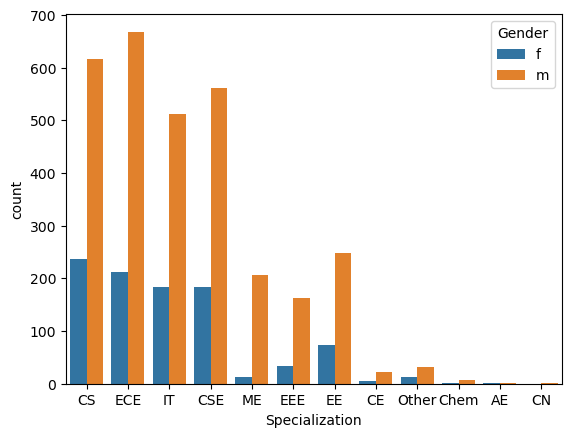

In [86]:
sns.countplot(x=df['Specialization'],hue=df['Gender'])

## Conclusion